<a href="https://colab.research.google.com/github/sarcasmsc/TitanicDatasetModels/blob/main/Machine_Learning_Titanic_Dataset_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning: Titanic Dataset Project 

# Step 1: Import Libraries

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn import tree 
from sklearn.tree import DecisionTreeClassifier
import graphviz
from io import StringIO
import pydotplus
from IPython.display import Image
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, HistGradientBoostingClassifier

**Upload Files**

In [ ]:
#upload data set
from google.colab import files
titaniccsv = files.upload()

Saving Titanic.csv to Titanic.csv


In [ ]:
#setting data set as variable/dataframe
titanic = pd.read_csv('Titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Step 2: Load the Titanic.csv Data

# Manipulating Data

I decided to add a few columns to try and create more data for the models to compare. To be able to use male/female in the models I had to impute the data. I also created a column that measured whether the person was an adult or child, along with checking if they were male or female. I also imputed the data for Embarked, and created 2 different variables for fare, one with whether or not their fare was above the average cost(32), along with one that compared if their fare was above the median cost(14). I created a second age category that separated ages into 3 categories which were people below 18, 18 to 34, and 35+.

In [ ]:
#changing string to int variables with fare2 being above or below median fare
titanic.loc[titanic['Sex'] == 'male', 'Sex2'] = 1
titanic.loc[titanic['Sex'] == 'female', 'Sex2'] = 0
titanic.loc[(titanic['Sex'] == 'male') & (titanic['Age'] >= 18), 'AdultChildMaleFemale'] = 0
titanic.loc[(titanic['Sex'] == 'male') & (titanic['Age'] < 18), 'AdultChildMaleFemale'] = 1
titanic.loc[(titanic['Sex'] == 'female') & (titanic['Age'] >= 18), 'AdultChildMaleFemale'] = 2
titanic.loc[(titanic['Sex'] == 'female') & (titanic['Age'] > 18), 'AdultChildMaleFemale'] = 3
titanic.loc[titanic['Embarked'] == 'S', 'Embarked2'] = 0
titanic.loc[titanic['Embarked'] == 'C', 'Embarked2'] = 1
titanic.loc[titanic['Embarked'] == 'Q', 'Embarked2'] = 2
titanic.loc[titanic['Fare'] <= 14, 'Fare2'] = 0
titanic.loc[titanic['Fare'] > 14, 'Fare2'] = 1
titanic.loc[titanic['Fare'] <= 32, 'Fare3'] = 0
titanic.loc[titanic['Fare'] > 32, 'Fare3'] = 1
titanic.loc[(titanic['Age'] >= 0) & (titanic['Age'] < 18), 'Age2'] = 0
titanic.loc[(titanic['Age'] >= 18) & (titanic['Age'] < 35), 'Age2'] = 1
titanic.loc[titanic['Age'] >= 35, 'Age2'] = 2

I also made a 2nd dataset which created a column for the first letter of each passengers name to see if the algorithms would find correlation between first names and survival. Surprisingly, this improved some of my results.

In [ ]:
titanic2 = titanic

titanic2.loc[titanic2['Name'].astype(str).str[0] == 'A', 'Name2'] = 1
titanic2.loc[titanic2['Name'].astype(str).str[0] == 'B', 'Name2'] = 2
titanic2.loc[titanic2['Name'].astype(str).str[0] == 'C', 'Name2'] = 3
titanic2.loc[titanic2['Name'].astype(str).str[0] == 'D', 'Name2'] = 4
titanic2.loc[titanic2['Name'].astype(str).str[0] == 'E', 'Name2'] = 5
titanic2.loc[titanic2['Name'].astype(str).str[0] == 'F', 'Name2'] = 6
titanic2.loc[titanic2['Name'].astype(str).str[0] == 'G', 'Name2'] = 7
titanic2.loc[titanic2['Name'].astype(str).str[0] == 'H', 'Name2'] = 8
titanic2.loc[titanic2['Name'].astype(str).str[0] == 'I', 'Name2'] = 9
titanic2.loc[titanic2['Name'].astype(str).str[0] == 'J', 'Name2'] = 10
titanic2.loc[titanic2['Name'].astype(str).str[0] == 'K', 'Name2'] = 11
titanic2.loc[titanic2['Name'].astype(str).str[0] == 'L', 'Name2'] = 12
titanic2.loc[titanic2['Name'].astype(str).str[0] == 'M', 'Name2'] = 13
titanic2.loc[titanic2['Name'].astype(str).str[0] == 'N', 'Name2'] = 14
titanic2.loc[titanic2['Name'].astype(str).str[0] == 'O', 'Name2'] = 15
titanic2.loc[titanic2['Name'].astype(str).str[0] == 'P', 'Name2'] = 16
titanic2.loc[titanic2['Name'].astype(str).str[0] == 'Q', 'Name2'] = 17
titanic2.loc[titanic2['Name'].astype(str).str[0] == 'R', 'Name2'] = 18
titanic2.loc[titanic2['Name'].astype(str).str[0] == 'S', 'Name2'] = 19
titanic2.loc[titanic2['Name'].astype(str).str[0] == 'T', 'Name2'] = 20
titanic2.loc[titanic2['Name'].astype(str).str[0] == 'U', 'Name2'] = 21
titanic2.loc[titanic2['Name'].astype(str).str[0] == 'V', 'Name2'] = 22
titanic2.loc[titanic2['Name'].astype(str).str[0] == 'W', 'Name2'] = 23
titanic2.loc[titanic2['Name'].astype(str).str[0] == 'X', 'Name2'] = 24
titanic2.loc[titanic2['Name'].astype(str).str[0] == 'Y', 'Name2'] = 25
titanic2.loc[titanic2['Name'].astype(str).str[0] == 'Z', 'Name2'] = 26

titanic2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex2,AdultChildMaleFemale,Embarked2,Fare2,Fare3,Age2,Name2
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1.0,0.0,0.0,0.0,0.0,1.0,2.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.0,3.0,1.0,1.0,1.0,2.0,3.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.0,3.0,0.0,0.0,0.0,1.0,8.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0.0,3.0,0.0,1.0,1.0,2.0,6.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1.0,0.0,0.0,0.0,0.0,2.0,1.0


In [ ]:
#finding median and mean fare
print(titanic[['Fare']].median())
print(titanic[['Fare']].mean())

# Step 3 and 4: Split the Data, Clean and Preprocess the Data

I split and tested the data multiple times, each few times I ran the data I documented my results below. I started off with LogReg.

# Step 5: Build the Baseline Model

#LogReg

I first tested some LogReg models to see what columns gave accurate results. AdultChildMaleFemale column ended up being the most accurate for LogReg

**Results**

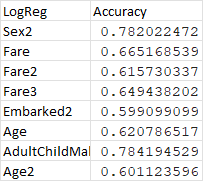

In [ ]:
#variables for logistic regression
y = titanic[['Survived']]
X = titanic[['Sex2']]

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3333, random_state=42) 

#logistic regression for sex vs survived
log_reg = LogisticRegression(random_state=0)
log_reg_model = log_reg.fit(X_train, y_train)
accuracy = log_reg_model.score(X_train, y_train)
print('sex2-survival log_reg accuracy')
print(accuracy)

#variables for logistic regression
y = titanic[['Survived']]
X = titanic[['Fare']]

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3333, random_state=42) 

#logistic regression for sex vs survived
log_reg = LogisticRegression(random_state=0)
log_reg_model = log_reg.fit(X_train, y_train)
accuracy = log_reg_model.score(X_train, y_train)
print('fare-survival log_reg accuracy')
print(accuracy)

#variables for logistic regression
y = titanic[['Survived']]
X = titanic[['Fare2']]

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3333, random_state=42) 

#logistic regression for sex vs survived
log_reg = LogisticRegression(random_state=0)
log_reg_model = log_reg.fit(X_train, y_train)
accuracy = log_reg_model.score(X_train, y_train)
print('fare2-survival log_reg accuracy')
print(accuracy)

#variables for logistic regression
y = titanic[['Survived']]
X = titanic[['Fare3']]

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3333, random_state=42) 

#logistic regression for sex vs survived
log_reg = LogisticRegression(random_state=0)
log_reg_model = log_reg.fit(X_train, y_train)
accuracy = log_reg_model.score(X_train, y_train)
print('fare3-survival log_reg accuracy')
print(accuracy)


#variables for logistic regression
y = titanic[['Survived', 'Embarked2']]
y = y.dropna()
y = y[['Survived']]
X = titanic[['Embarked2']]
X = X.dropna()

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3333, random_state=42) 

#logistic regression for sex vs survived
log_reg = LogisticRegression(random_state=0)
log_reg_model = log_reg.fit(X_train, y_train)
accuracy = log_reg_model.score(X_train, y_train)
print('embarked2-survival log_reg accuracy')
print(accuracy)

#variables for logistic regression
y = titanic[['Survived', 'Age']]
y = y.dropna()
y = y[['Survived']]
X = titanic[['Age']]
X = X.dropna()

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3333, random_state=42) 

#logistic regression for sex vs survived
log_reg = LogisticRegression(random_state=0)
log_reg_model = log_reg.fit(X_train, y_train)
accuracy = log_reg_model.score(X_train, y_train)
print('age-survival log_reg accuracy')
print(accuracy)

#variables for logistic regression
y = titanic[['Survived', 'AdultChildMaleFemale']]
y = y.dropna()
y = y[['Survived']]
X = titanic[['AdultChildMaleFemale']]
X = X.dropna()

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3333, random_state=42) 

#logistic regression for sex vs survived
log_reg = LogisticRegression(random_state=0)
log_reg_model = log_reg.fit(X_train, y_train)
accuracy = log_reg_model.score(X_train, y_train)
print('AdultChildMaleFemale-survival log_reg accuracy')
print(accuracy)

#variables for logistic regression
y = titanic[['Survived', 'Age2']]
y = y.dropna()
y = y[['Survived']]
X = titanic[['Age2']]
X = X.dropna()

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3333, random_state=42) 

#logistic regression for sex vs survived
log_reg = LogisticRegression(random_state=0)
log_reg_model = log_reg.fit(X_train, y_train)
accuracy = log_reg_model.score(X_train, y_train)
print('Age2-survival log_reg accuracy')
print(accuracy)

sex2-survival log_reg accuracy
0.7820224719101123
fare-survival log_reg accuracy
0.6651685393258427
fare2-survival log_reg accuracy
0.6157303370786517
fare3-survival log_reg accuracy
0.6494382022471911
embarked2-survival log_reg accuracy
0.5990990990990991
age-survival log_reg accuracy
0.6207865168539326
AdultChildMaleFemale-survival log_reg accuracy
0.78419452887538
Age2-survival log_reg accuracy
0.601123595505618


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

# Trees

I wanted to try some decision trees to see what kind of accuracies I could get. Initially I just dropped in as many columns as I could, to see what kind of results I would get, adjusting or changing a few columns each tree.

**Results**

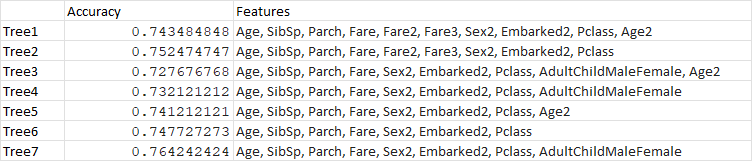

In [ ]:
#Tree1
y = titanic['Survived']
X = titanic.drop(['Survived', 'PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked', 'Sex'], axis=1)

#train_test_split
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3333, random_state=42) 

#pipeline for decision tree
tree0 = Pipeline([
    ('imp_mean', SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('scaler', StandardScaler()),
    ('tree', DecisionTreeClassifier(criterion='entropy',random_state=42))

])

tree0.fit(X_train, y_train)

import sklearn
#decision tree visual

features = ['Age', 'SibSp', 'Parch', 'Fare', 'Fare2', 'Fare3', 'Sex2', 'Embarked2', 'Pclass', 'AdultChildMaleFemale', 'Age2']

dot_data = StringIO()
sklearn.tree.export_graphviz(tree0.named_steps['tree'], out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = features,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('tree.png')
Image(graph.create_png())

#drop print to get the image
scores = cross_val_score(tree0, X_train, y_train, cv=10)
print('Tree1 score with Age, SibSp, Parch, Fare, Fare2, Fare3, Sex2, Embarked2, Pclass, Age2')
print(scores.mean())

#Tree2
y = titanic['Survived']
X = titanic.drop(['Survived', 'PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked', 'Sex', 'Age2'], axis=1)

#train_test_split
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3333, random_state=42) 

#pipeline for decision tree
tree0 = Pipeline([
    ('imp_mean', SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('scaler', StandardScaler()),
    ('tree', DecisionTreeClassifier(criterion='entropy',random_state=42))

])

tree0.fit(X_train, y_train)

import sklearn
#decision tree visual

features = ['Age', 'SibSp', 'Parch', 'Fare', 'Fare2', 'Fare3', 'Sex2', 'Embarked2', 'Pclass', 'AdultChildMaleFemale']

dot_data = StringIO()
sklearn.tree.export_graphviz(tree0.named_steps['tree'], out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = features,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('tree.png')
Image(graph.create_png())

#drop print to get the image
scores = cross_val_score(tree0, X_train, y_train, cv=10)
print('Tree2 score with Age, SibSp, Parch, Fare, Fare2, Fare3, Sex2, Embarked2, Pclass')
print(scores.mean())

#Tree3
y = titanic['Survived']
X = titanic.drop(['Survived', 'PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked', 'Sex', 'Fare2', 'Fare3'], axis=1)

#train_test_split
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3333, random_state=42) 

#pipeline for decision tree
tree0b = Pipeline([
    ('imp_mean', SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('scaler', StandardScaler()),
    ('tree', DecisionTreeClassifier(criterion='entropy',random_state=42))

])

tree0b.fit(X_train, y_train)

import sklearn
#decision tree visual

features = ['Age', 'SibSp', 'Parch', 'Fare', 'Sex2', 'Embarked2', 'Pclass', 'AdultChildMaleFemale', 'Age2']

dot_data = StringIO()
sklearn.tree.export_graphviz(tree0b.named_steps['tree'], out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = features,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('tree.png')
Image(graph.create_png())

#drop print to get the image
scores = cross_val_score(tree0b, X_train, y_train, cv=10)
print('Tree3 score with Age, SibSp, Parch, Fare, Sex2, Embarked2, Pclass, AdultChildMaleFemale, Age2')
print(scores.mean())

#Tree4
y = titanic['Survived']
X = titanic.drop(['Survived', 'PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked', 'Sex', 'Fare2', 'Fare3', 'Age2'], axis=1)

#train_test_split
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3333, random_state=42) 

#pipeline for decision tree
tree0b = Pipeline([
    ('imp_mean', SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('scaler', StandardScaler()),
    ('tree', DecisionTreeClassifier(criterion='entropy',random_state=42))

])

tree0b.fit(X_train, y_train)

import sklearn
#decision tree visual

features = ['Age', 'SibSp', 'Parch', 'Fare', 'Sex2', 'Embarked2', 'Pclass', 'AdultChildMaleFemale']

dot_data = StringIO()
sklearn.tree.export_graphviz(tree0b.named_steps['tree'], out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = features,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('tree.png')
Image(graph.create_png())

#drop print to get the image
scores = cross_val_score(tree0b, X_train, y_train, cv=10)
print('Tree4 score with Age, SibSp, Parch, Fare, Sex2, Embarked2, Pclass, AdultChildMaleFemale')
print(scores.mean())

#Tree5
y = titanic['Survived']
X = titanic.drop(['Survived', 'PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked', 'Sex', 'Fare2', 'Fare3', 'AdultChildMaleFemale'], axis=1)

#train_test_split
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3333, random_state=42) 

#pipeline for decision tree
tree0c = Pipeline([
    ('imp_mean', SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('scaler', StandardScaler()),
    ('tree', DecisionTreeClassifier(criterion='entropy',random_state=42))

])

tree0c.fit(X_train, y_train)

import sklearn
#decision tree visual

features = ['Age', 'SibSp', 'Parch', 'Fare', 'Sex2', 'Embarked2', 'Pclass', 'Age2']

dot_data = StringIO()
sklearn.tree.export_graphviz(tree0c.named_steps['tree'], out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = features,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('tree.png')
Image(graph.create_png())

#drop print to get the image
scores = cross_val_score(tree0c, X_train, y_train, cv=10)
print('Tree5 score with Age, SibSp, Parch, Fare, Sex2, Embarked2, Pclass, Age2')
print(scores.mean())

#Tree6
y = titanic['Survived']
X = titanic.drop(['Survived', 'PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked', 'Sex', 'Fare2', 'Fare3', 'AdultChildMaleFemale', 'Age2'], axis=1)

#train_test_split
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3333, random_state=42) 

#pipeline for decision tree
tree0c = Pipeline([
    ('imp_mean', SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('scaler', StandardScaler()),
    ('tree', DecisionTreeClassifier(criterion='entropy',random_state=42))

])

tree0c.fit(X_train, y_train)

import sklearn
#decision tree visual

features = ['Age', 'SibSp', 'Parch', 'Fare', 'Sex2', 'Embarked2', 'Pclass']

dot_data = StringIO()
sklearn.tree.export_graphviz(tree0c.named_steps['tree'], out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = features,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('tree.png')
Image(graph.create_png())

#drop print to get the image
scores = cross_val_score(tree0c, X_train, y_train, cv=10)
print('Tree6 score with Age, SibSp, Parch, Fare, Sex2, Embarked2, Pclass')
print(scores.mean())

Tree1 score with Age, SibSp, Parch, Fare, Fare2, Fare3, Sex2, Embarked2, Pclass, Age2
0.7434848484848485
Tree2 score with Age, SibSp, Parch, Fare, Fare2, Fare3, Sex2, Embarked2, Pclass
0.7524747474747475
Tree3 score with Age, SibSp, Parch, Fare, Sex2, Embarked2, Pclass, AdultChildMaleFemale, Age2
0.7276767676767676
Tree4 score with Age, SibSp, Parch, Fare, Sex2, Embarked2, Pclass, AdultChildMaleFemale
0.7321212121212122
Tree5 score with Age, SibSp, Parch, Fare, Sex2, Embarked2, Pclass, Age2
0.7412121212121212
Tree6 score with Age, SibSp, Parch, Fare, Sex2, Embarked2, Pclass
0.7477272727272727


In [ ]:
#Tree7
y = titanic['Survived']
X = titanic.drop(['Survived', 'PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked', 'Sex', 'Fare', 'Fare3', 'Age2'], axis=1)

#train_test_split
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3333, random_state=42) 

#pipeline for decision tree
tree1 = Pipeline([
    ('imp_mean', SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('scaler', StandardScaler()),
    ('tree', DecisionTreeClassifier(criterion='entropy',random_state=42))

])

tree1.fit(X_train, y_train)

import sklearn
#decision tree visual

features = ['Age', 'SibSp', 'Parch', 'Fare2', 'Sex2', 'Embarked2', 'AdultChildMaleFemale', 'Pclass']

dot_data = StringIO()
sklearn.tree.export_graphviz(tree1.named_steps['tree'], out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = features,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('tree.png')
Image(graph.create_png())

#drop print to get the image
scores = cross_val_score(tree1, X_train, y_train, cv=10)
print('Tree7 score with Age, SibSp, Parch, Fare, Sex2, Embarked2, Pclass, AdultChildMaleFemale')
print(scores.mean())

Tree7 score with Age, SibSp, Parch, Fare, Sex2, Embarked2, Pclass, AdultChildMaleFemale
0.7642424242424242


With some idea of the accuracies from each combination of features, I wanted to try and run the decision trees based around the concept of tree7 since it was the most accurate.

**Results**

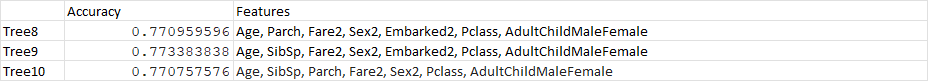

In [ ]:
#Tree8
y = titanic['Survived']
X = titanic.drop(['Survived', 'PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked', 'Sex', 'Fare', 'Fare3', 'Age2', 'SibSp'], axis=1)

#train_test_split
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3333, random_state=42) 

#pipeline for decision tree
tree1 = Pipeline([
    ('imp_mean', SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('scaler', StandardScaler()),
    ('tree', DecisionTreeClassifier(criterion='entropy',random_state=42))

])

tree1.fit(X_train, y_train)

import sklearn
#decision tree visual

features = ['Age', 'Parch', 'Fare2', 'Sex2', 'Embarked2', 'AdultChildMaleFemale', 'Pclass']

dot_data = StringIO()
sklearn.tree.export_graphviz(tree1.named_steps['tree'], out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = features,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('tree.png')
Image(graph.create_png())

#drop print to get the image
scores = cross_val_score(tree1, X_train, y_train, cv=10)
print('Tree8 score with Age, Parch, Fare2, Sex2, Embarked2, Pclass, AdultChildMaleFemale')
print(scores.mean())

#Tree9
y = titanic['Survived']
X = titanic.drop(['Survived', 'PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked', 'Sex', 'Fare', 'Fare3', 'Age2', 'Parch'], axis=1)

#train_test_split
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3333, random_state=42) 

#pipeline for decision tree
tree1 = Pipeline([
    ('imp_mean', SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('scaler', StandardScaler()),
    ('tree', DecisionTreeClassifier(criterion='entropy',random_state=42))

])

tree1.fit(X_train, y_train)

import sklearn
#decision tree visual

features = ['Age', 'SibSp', 'Fare2', 'Sex2', 'Embarked2', 'AdultChildMaleFemale', 'Pclass']

dot_data = StringIO()
sklearn.tree.export_graphviz(tree1.named_steps['tree'], out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = features,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('tree.png')
Image(graph.create_png())

#drop print to get the image
scores = cross_val_score(tree1, X_train, y_train, cv=10)
print('Tree9 score with Age, SibSp, Fare2, Sex2, Embarked2, Pclass, AdultChildMaleFemale')
print(scores.mean())

#Tree10
y = titanic['Survived']
X = titanic.drop(['Survived', 'PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked', 'Sex', 'Fare', 'Fare3', 'Age2', 'Embarked2'], axis=1)

#train_test_split
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3333, random_state=42) 

#pipeline for decision tree
tree1 = Pipeline([
    ('imp_mean', SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('scaler', StandardScaler()),
    ('tree', DecisionTreeClassifier(criterion='entropy',random_state=42))

])

tree1.fit(X_train, y_train)

import sklearn
#decision tree visual

features = ['Age', 'SibSp', 'Parch', 'Fare2', 'Sex2', 'AdultChildMaleFemale', 'Pclass']

dot_data = StringIO()
sklearn.tree.export_graphviz(tree1.named_steps['tree'], out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = features,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('tree.png')
Image(graph.create_png())

#drop print to get the image
scores = cross_val_score(tree1, X_train, y_train, cv=10)
print('Tree10 score with Age, SibSp, Parch, Fare2, Sex2, Pclass, AdultChildMaleFemale')
print(scores.mean())

Tree8 score with Age, Parch, Fare, Sex2, Embarked2, Pclass, AdultChildMaleFemale
0.7709595959595961
Tree9 score with Age, SibSp, Fare2, Sex2, Pclass, AdultChildMaleFemale
0.7733838383838385
Tree10 score with Age, SibSp, Parch, Fare2, Sex2, Pclass, AdultChildMaleFemale
0.7707575757575758


Because these were the best trees I had gotten so far, I decided to change the features based around these trees again for the next trees.

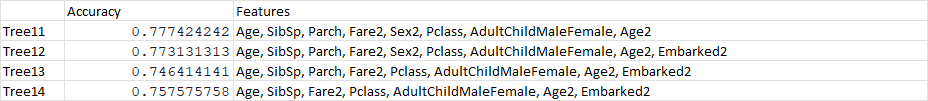

In [ ]:
#Tree11
y = titanic['Survived']
X = titanic.drop(['Survived', 'PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked', 'Sex', 'Fare', 'Fare3', 'Embarked2'], axis=1)

#train_test_split
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3333, random_state=42) 

#pipeline for decision tree
tree1 = Pipeline([
    ('imp_mean', SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('scaler', StandardScaler()),
    ('tree', DecisionTreeClassifier(criterion='entropy',random_state=42))

])

tree1.fit(X_train, y_train)

import sklearn
#decision tree visual

features = ['Age', 'SibSp', 'Parch', 'Fare2', 'Sex2', 'AdultChildMaleFemale', 'Pclass', 'Age2']

dot_data = StringIO()
sklearn.tree.export_graphviz(tree1.named_steps['tree'], out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = features,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('tree.png')
Image(graph.create_png())

#drop print to get the image
scores = cross_val_score(tree1, X_train, y_train, cv=10)
print('Tree11 score with Age, SibSp, Parch, Fare2, Sex2, Pclass, AdultChildMaleFemale, Age2')
print(scores.mean())

#Tree12
y = titanic['Survived']
X = titanic.drop(['Survived', 'PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked', 'Sex', 'Fare', 'Fare3'], axis=1)

#train_test_split
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3333, random_state=42) 

#pipeline for decision tree
tree1 = Pipeline([
    ('imp_mean', SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('scaler', StandardScaler()),
    ('tree', DecisionTreeClassifier(criterion='entropy',random_state=42))

])

tree1.fit(X_train, y_train)

import sklearn
#decision tree visual

features = ['Age', 'SibSp', 'Parch', 'Fare2', 'Sex2', 'AdultChildMaleFemale', 'Pclass', 'Age2', 'Embarked2']

dot_data = StringIO()
sklearn.tree.export_graphviz(tree1.named_steps['tree'], out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = features,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('tree.png')
Image(graph.create_png())

#drop print to get the image
scores = cross_val_score(tree1, X_train, y_train, cv=10)
print('Tree12 score with Age, SibSp, Parch, Fare2, Sex2, Pclass, AdultChildMaleFemale, Age2, Embarked2')
print(scores.mean())

#Tree13
y = titanic['Survived']
X = titanic.drop(['Survived', 'PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked', 'Sex', 'Fare', 'Fare3', 'Sex2'], axis=1)

#train_test_split
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3333, random_state=42) 

#pipeline for decision tree
tree1 = Pipeline([
    ('imp_mean', SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('scaler', StandardScaler()),
    ('tree', DecisionTreeClassifier(criterion='entropy',random_state=42))

])

tree1.fit(X_train, y_train)

import sklearn
#decision tree visual

features = ['Age', 'SibSp', 'Parch', 'Fare2', 'AdultChildMaleFemale', 'Pclass', 'Age2', 'Embarked2']

dot_data = StringIO()
sklearn.tree.export_graphviz(tree1.named_steps['tree'], out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = features,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('tree.png')
Image(graph.create_png())

#drop print to get the image
scores = cross_val_score(tree1, X_train, y_train, cv=10)
print('Tree13 score with Age, SibSp, Parch, Fare2, Pclass, AdultChildMaleFemale, Age2, Embarked2')
print(scores.mean())

#Tree14
y = titanic['Survived']
X = titanic.drop(['Survived', 'PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked', 'Sex', 'Fare', 'Fare3', 'Sex2', 'Parch'], axis=1)

#train_test_split
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3333, random_state=42) 

#pipeline for decision tree
tree1 = Pipeline([
    ('imp_mean', SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('scaler', StandardScaler()),
    ('tree', DecisionTreeClassifier(criterion='entropy',random_state=42))

])

tree1.fit(X_train, y_train)

import sklearn
#decision tree visual

features = ['Age', 'SibSp', 'Fare2', 'AdultChildMaleFemale', 'Pclass', 'Age2', 'Embarked2']

dot_data = StringIO()
sklearn.tree.export_graphviz(tree1.named_steps['tree'], out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = features,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('tree.png')
Image(graph.create_png())

#drop print to get the image
scores = cross_val_score(tree1, X_train, y_train, cv=10)
print('Tree14 score with Age, SibSp, Fare2, Pclass, AdultChildMaleFemale, Age2, Embarked2')
print(scores.mean())

Tree11 score with Age, SibSp, Parch, Fare2, Sex2, Pclass, AdultChildMaleFemale, Age2
0.7774242424242424
Tree12 score with Age, SibSp, Parch, Fare2, Sex2, Pclass, AdultChildMaleFemale, Age2, Embarked2
0.7731313131313131
Tree13 score with Age, SibSp, Parch, Fare2, Pclass, AdultChildMaleFemale, Age2, Embarked2
0.7464141414141414
Tree14 score with Age, SibSp, Fare2, Pclass, AdultChildMaleFemale, Age2, Embarked2
0.7575757575757576


So far the best results I could find were based around Trees 11, 9, 12, 8 and 10. I wanted to build more models based on what I had gotten from them. Though with only a 77% accuracy, it was actually worse than LogReg on Sex2 and AdultChildMaleFemale columns. So if there wasn't much improvement in a few more trees, I want to move on to other models.

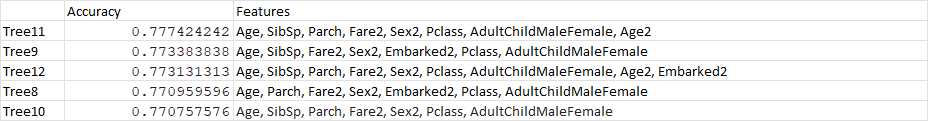

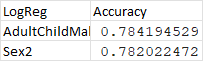

In [ ]:
#Tree15
y = titanic['Survived']
X = titanic.drop(['Survived', 'PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked', 'Sex', 'Fare', 'Fare3', 'Embarked2', 'Age'], axis=1)

#train_test_split
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3333, random_state=42) 

#pipeline for decision tree
tree1 = Pipeline([
    ('imp_mean', SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('scaler', StandardScaler()),
    ('tree', DecisionTreeClassifier(criterion='entropy',random_state=42))

])

tree1.fit(X_train, y_train)

import sklearn
#decision tree visual

features = [ 'SibSp', 'Parch', 'Fare2', 'Sex2', 'AdultChildMaleFemale', 'Pclass', 'Age2']

dot_data = StringIO()
sklearn.tree.export_graphviz(tree1.named_steps['tree'], out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = features,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('tree.png')
Image(graph.create_png())

#drop print to get the image
scores = cross_val_score(tree1, X_train, y_train, cv=10)
print('Tree15 score with SibSp, Parch, Fare2, Sex2, Pclass, AdultChildMaleFemale, Age2')
print(scores.mean())

#Tree16
y = titanic['Survived']
X = titanic.drop(['Survived', 'PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked', 'Sex', 'Fare', 'Fare3', 'Embarked2', 'Age', 'Parch'], axis=1)

#train_test_split
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3333, random_state=42) 

#pipeline for decision tree
tree1 = Pipeline([
    ('imp_mean', SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('scaler', StandardScaler()),
    ('tree', DecisionTreeClassifier(criterion='entropy',random_state=42))

])

tree1.fit(X_train, y_train)

import sklearn
#decision tree visual

features = [ 'SibSp', 'Fare2', 'Sex2', 'AdultChildMaleFemale', 'Pclass', 'Age2']

dot_data = StringIO()
sklearn.tree.export_graphviz(tree1.named_steps['tree'], out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = features,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('tree.png')
Image(graph.create_png())

#drop print to get the image
scores = cross_val_score(tree1, X_train, y_train, cv=10)
print('Tree16 score with SibSp, Fare2, Sex2, Pclass, AdultChildMaleFemale, Age2')
print(scores.mean())

#Tree17
y = titanic['Survived']
X = titanic.drop(['Survived', 'PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked', 'Sex', 'Fare', 'Fare3', 'Embarked2', 'Age', 'SibSp'], axis=1)

#train_test_split
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3333, random_state=42) 

#pipeline for decision tree
tree1 = Pipeline([
    ('imp_mean', SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('scaler', StandardScaler()),
    ('tree', DecisionTreeClassifier(criterion='entropy',random_state=42))

])

tree1.fit(X_train, y_train)

import sklearn
#decision tree visual

features = [ 'Parch', 'Fare2', 'Sex2', 'AdultChildMaleFemale', 'Pclass', 'Age2']

dot_data = StringIO()
sklearn.tree.export_graphviz(tree1.named_steps['tree'], out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = features,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('tree.png')
Image(graph.create_png())

#drop print to get the image
scores = cross_val_score(tree1, X_train, y_train, cv=10)
print('Tree17 score with Parch, Fare2, Sex2, Pclass, AdultChildMaleFemale, Age2')
print(scores.mean())

Tree15 score with SibSp, Parch, Fare2, Sex2, Pclass, AdultChildMaleFemale, Age2
0.7976262626262626
Tree15 score with SibSp, Fare2, Sex2, Pclass, AdultChildMaleFemale, Age2
0.7727777777777777
Tree15 score with Parch, Fare2, Sex2, Pclass, AdultChildMaleFemale, Age2
0.8065151515151514


In [ ]:
#Tree18
y = titanic['Survived']
X = titanic.drop(['Survived', 'PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked', 'Sex', 'Fare3', 'Embarked2', 'Age'], axis=1)

#train_test_split
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3333, random_state=42) 

#pipeline for decision tree
tree1 = Pipeline([
    ('imp_mean', SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('scaler', StandardScaler()),
    ('tree', DecisionTreeClassifier(criterion='entropy',random_state=42))

])

tree1.fit(X_train, y_train)

import sklearn
#decision tree visual

features = [ 'SibSp', 'Parch', 'Fare2', 'Sex2', 'AdultChildMaleFemale', 'Pclass', 'Age2', 'Fare']

dot_data = StringIO()
sklearn.tree.export_graphviz(tree1.named_steps['tree'], out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = features,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('tree.png')
Image(graph.create_png())

#drop print to get the image
scores = cross_val_score(tree1, X_train, y_train, cv=10)
print('Tree18 score with SibSp, Parch, Fare, Fare2, Sex2, Pclass, AdultChildMaleFemale, Age2')
print(scores.mean())

#Tree19
y = titanic['Survived']
X = titanic.drop(['Survived', 'PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked', 'Sex', 'Fare3', 'Embarked2', 'Age', 'Parch'], axis=1)

#train_test_split
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3333, random_state=42) 

#pipeline for decision tree
tree1 = Pipeline([
    ('imp_mean', SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('scaler', StandardScaler()),
    ('tree', DecisionTreeClassifier(criterion='entropy',random_state=42))

])

tree1.fit(X_train, y_train)

import sklearn
#decision tree visual

features = [ 'SibSp', 'Fare', 'Fare2', 'Sex2', 'AdultChildMaleFemale', 'Pclass', 'Age2']

dot_data = StringIO()
sklearn.tree.export_graphviz(tree1.named_steps['tree'], out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = features,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('tree.png')
Image(graph.create_png())

#drop print to get the image
scores = cross_val_score(tree1, X_train, y_train, cv=10)
print('Tree19 score with SibSp, Fare, Fare2, Sex2, Pclass, AdultChildMaleFemale, Age2')
print(scores.mean())

#Tree20
y = titanic['Survived']
X = titanic.drop(['Survived', 'PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked', 'Sex', 'Fare3', 'Embarked2', 'Age', 'SibSp'], axis=1)

#train_test_split
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3333, random_state=42) 

#pipeline for decision tree
tree1 = Pipeline([
    ('imp_mean', SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('scaler', StandardScaler()),
    ('tree', DecisionTreeClassifier(criterion='entropy',random_state=42))

])

tree1.fit(X_train, y_train)

import sklearn
#decision tree visual

features = [ 'Parch', 'Fare', 'Fare2', 'Sex2', 'AdultChildMaleFemale', 'Pclass', 'Age2']

dot_data = StringIO()
sklearn.tree.export_graphviz(tree1.named_steps['tree'], out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = features,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('tree.png')
Image(graph.create_png())

#drop print to get the image
scores = cross_val_score(tree1, X_train, y_train, cv=10)
print('Tree20 score with Parch, Fare, Fare2, Sex2, Pclass, AdultChildMaleFemale, Age2')
print(scores.mean())

Tree18 score with SibSp, Parch, Fare, Fare2, Sex2, Pclass, AdultChildMaleFemale, Age2
0.7796969696969697
Tree19 score with SibSp, Fare, Fare2, Sex2, Pclass, AdultChildMaleFemale, Age2
0.7707070707070707
Tree20 score with Parch, Fare, Fare2, Sex2, Pclass, AdultChildMaleFemale, Age2
0.791010101010101


In [ ]:
#Tree21
y = titanic['Survived']
X = titanic.drop(['Survived', 'PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked', 'Sex', 'Fare3', 'Embarked2', 'Age', 'Fare2'], axis=1)

#train_test_split
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3333, random_state=42) 

#pipeline for decision tree
tree1 = Pipeline([
    ('imp_mean', SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('scaler', StandardScaler()),
    ('tree', DecisionTreeClassifier(criterion='entropy',random_state=42))

])

tree1.fit(X_train, y_train)

import sklearn
#decision tree visual

features = [ 'SibSp', 'Parch', 'Sex2', 'AdultChildMaleFemale', 'Pclass', 'Age2', 'Fare']

dot_data = StringIO()
sklearn.tree.export_graphviz(tree1.named_steps['tree'], out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = features,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('tree.png')
Image(graph.create_png())

#drop print to get the image
scores = cross_val_score(tree1, X_train, y_train, cv=10)
print('Tree21 score with SibSp, Parch, Fare, Sex2, Pclass, AdultChildMaleFemale, Age2')
print(scores.mean())

#Tree22
y = titanic['Survived']
X = titanic.drop(['Survived', 'PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked', 'Sex', 'Fare3', 'Embarked2', 'Age', 'Parch', 'Fare2'], axis=1)

#train_test_split
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3333, random_state=42) 

#pipeline for decision tree
tree1 = Pipeline([
    ('imp_mean', SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('scaler', StandardScaler()),
    ('tree', DecisionTreeClassifier(criterion='entropy',random_state=42))

])

tree1.fit(X_train, y_train)

import sklearn
#decision tree visual

features = [ 'SibSp', 'Fare', 'Sex2', 'AdultChildMaleFemale', 'Pclass', 'Age2']

dot_data = StringIO()
sklearn.tree.export_graphviz(tree1.named_steps['tree'], out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = features,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('tree.png')
Image(graph.create_png())

#drop print to get the image
scores = cross_val_score(tree1, X_train, y_train, cv=10)
print('Tree21 score with SibSp, Fare, Sex2, Pclass, AdultChildMaleFemale, Age2')
print(scores.mean())

#Tree23
y = titanic['Survived']
X = titanic.drop(['Survived', 'PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked', 'Sex', 'Fare3', 'Fare2', 'Embarked2', 'Age', 'SibSp'], axis=1)

#train_test_split
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3333, random_state=42) 

#pipeline for decision tree
tree1 = Pipeline([
    ('imp_mean', SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('scaler', StandardScaler()),
    ('tree', DecisionTreeClassifier(criterion='entropy',random_state=42))

])

tree1.fit(X_train, y_train)

import sklearn
#decision tree visual

features = [ 'Parch', 'Fare', 'Sex2', 'AdultChildMaleFemale', 'Pclass', 'Age2']

dot_data = StringIO()
sklearn.tree.export_graphviz(tree1.named_steps['tree'], out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = features,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('tree.png')
Image(graph.create_png())

#drop print to get the image
scores = cross_val_score(tree1, X_train, y_train, cv=10)
print('Tree22 score with Parch, Fare, Sex2, Pclass, AdultChildMaleFemale, Age2')
print(scores.mean())

Tree18 score with SibSp, Parch, Fare, Sex2, Pclass, AdultChildMaleFemale, Age2
0.7706060606060606
Tree19 score with SibSp, Fare, Sex2, Pclass, AdultChildMaleFemale, Age2
0.7753030303030302
Tree20 score with Parch, Fare, Sex2, Pclass, AdultChildMaleFemale, Age2
0.7932828282828284


With this last set of trees, I finally found some improvement, with my highest accuracy being 80% on Tree 17. Though at this point it feels that either I am not tuning the parameters correctly or the model may not be very good with this data. I wanted to build more models around Tree 17 since it was giving me the best results.

**Results**

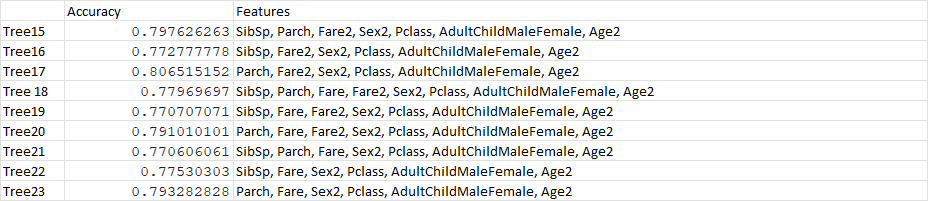

In [ ]:
#Tree24
y = titanic['Survived']
X = titanic.drop(['Survived', 'PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked', 'Sex', 'Fare', 'Fare3', 'Embarked2', 'Age', 'SibSp', 'Age2'], axis=1)

#train_test_split
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3333, random_state=42) 

#pipeline for decision tree
tree1 = Pipeline([
    ('imp_mean', SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('scaler', StandardScaler()),
    ('tree', DecisionTreeClassifier(criterion='entropy',random_state=42))

])

tree1.fit(X_train, y_train)

import sklearn
#decision tree visual

features = [ 'Parch', 'Fare2', 'Sex2', 'AdultChildMaleFemale', 'Pclass']

dot_data = StringIO()
sklearn.tree.export_graphviz(tree1.named_steps['tree'], out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = features,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('tree.png')
Image(graph.create_png())

#drop print to get the image
scores = cross_val_score(tree1, X_train, y_train, cv=10)
print('Tree24 score with Parch, Fare2, Sex2, Pclass, AdultChildMaleFemale')
print(scores.mean())

#Tree25
y = titanic['Survived']
X = titanic.drop(['Survived', 'PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked', 'Sex', 'Fare', 'Fare3', 'Age', 'SibSp', 'Age2'], axis=1)

#train_test_split
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3333, random_state=42) 

#pipeline for decision tree
tree1 = Pipeline([
    ('imp_mean', SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('scaler', StandardScaler()),
    ('tree', DecisionTreeClassifier(criterion='entropy',random_state=42))

])

tree1.fit(X_train, y_train)

import sklearn
#decision tree visual

features = [ 'Parch', 'Fare2', 'Sex2', 'AdultChildMaleFemale', 'Pclass', 'Embarked2']

dot_data = StringIO()
sklearn.tree.export_graphviz(tree1.named_steps['tree'], out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = features,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('tree.png')
Image(graph.create_png())

#drop print to get the image
scores = cross_val_score(tree1, X_train, y_train, cv=10)
print('Tree25 score with Parch, Fare2, Sex2, Pclass, AdultChildMaleFemale, Embarked2')
print(scores.mean())

#Tree26
y = titanic['Survived']
X = titanic.drop(['Survived', 'PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked', 'Sex', 'Fare', 'Fare3', 'Age', 'SibSp'], axis=1)

#train_test_split
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3333, random_state=42) 

#pipeline for decision tree
tree1 = Pipeline([
    ('imp_mean', SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('scaler', StandardScaler()),
    ('tree', DecisionTreeClassifier(criterion='entropy',random_state=42))

])

tree1.fit(X_train, y_train)

import sklearn
#decision tree visual

features = [ 'Parch', 'Fare2', 'Sex2', 'AdultChildMaleFemale', 'Pclass', 'Age2', 'Embarked2']

dot_data = StringIO()
sklearn.tree.export_graphviz(tree1.named_steps['tree'], out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = features,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('tree.png')
Image(graph.create_png())

#drop print to get the image
scores = cross_val_score(tree1, X_train, y_train, cv=10)
print('Tree26 score with Parch, Fare2, Sex2, Pclass, AdultChildMaleFemale, Embarked2, Age2')
print(scores.mean())

Tree24 score with Parch, Fare2, Sex2, Pclass, AdultChildMaleFemale
0.802070707070707
Tree25 score with Parch, Fare2, Sex2, Pclass, AdultChildMaleFemale, Embarked2
0.82020202020202
Tree26 score with Parch, Fare2, Sex2, Pclass, AdultChildMaleFemale, Embarked2, Age2
0.8022222222222222


Building around Tree 17 I was able to find one tree that was more accurate, jumping to 82% accuracy.

**Results**

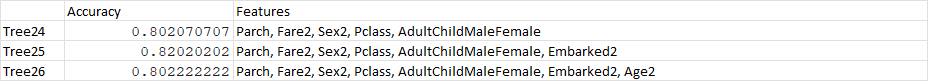

In [ ]:
#Tree27
y = titanic['Survived']
X = titanic.drop(['Survived', 'PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked', 'Sex', 'Fare', 'Fare3', 'SibSp'], axis=1)

#train_test_split
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3333, random_state=42) 

#pipeline for decision tree
tree1 = Pipeline([
    ('imp_mean', SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('scaler', StandardScaler()),
    ('tree', DecisionTreeClassifier(criterion='entropy',random_state=42))

])

tree1.fit(X_train, y_train)

import sklearn
#decision tree visual

features = [ 'Parch', 'Fare2', 'Sex2', 'AdultChildMaleFemale', 'Pclass', 'Age2', 'Embarked2', 'Age']

dot_data = StringIO()
sklearn.tree.export_graphviz(tree1.named_steps['tree'], out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = features,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('tree.png')
Image(graph.create_png())

#drop print to get the image
scores = cross_val_score(tree1, X_train, y_train, cv=10)
print('Tree27 score with Parch, Fare2, Sex2, Pclass, AdultChildMaleFemale, Embarked2, Age2, Age')
print(scores.mean())

#Tree28
y = titanic['Survived']
X = titanic.drop(['Survived', 'PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked', 'Sex', 'Fare', 'Fare3', 'SibSp', 'Age2'], axis=1)

#train_test_split
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3333, random_state=42) 

#pipeline for decision tree
tree1 = Pipeline([
    ('imp_mean', SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('scaler', StandardScaler()),
    ('tree', DecisionTreeClassifier(criterion='entropy',random_state=42))

])

tree1.fit(X_train, y_train)

import sklearn
#decision tree visual

features = [ 'Parch', 'Fare2', 'Sex2', 'AdultChildMaleFemale', 'Pclass', 'Embarked2', 'Age']

dot_data = StringIO()
sklearn.tree.export_graphviz(tree1.named_steps['tree'], out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = features,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('tree.png')
Image(graph.create_png())

#drop print to get the image
scores = cross_val_score(tree1, X_train, y_train, cv=10)
print('Tree28 score with Parch, Fare2, Sex2, Pclass, AdultChildMaleFemale, Embarked2, Age')
print(scores.mean())

Tree27 score with Parch, Fare2, Sex2, Pclass, AdultChildMaleFemale, Embarked2, Age2, Age
0.7777777777777779
Tree28 score with Parch, Fare2, Sex2, Pclass, AdultChildMaleFemale, Embarked2, Age
0.7709595959595961


In [ ]:
#checking data types because i forgot to change some columns
titanic.dtypes

In [ ]:
#checking correlation of data
titanic.corr()

In [ ]:
titanic.head()

# AdaBoost, GradientBoost, HistGradientBoost

I first wanted to see the accuracy of AdaBoost and Gradientboost with all parameters then compared it to if I dropped SibSp, Parch and Embarked2. (though they are named adaboost and adaboostv2, and gb and gbv2, they are not the same as adaboost1/adaboost2, and GB1 and GB2, i did this earlier on and forgot to assign them higher numbers since they are being treated as controls)

**Results**

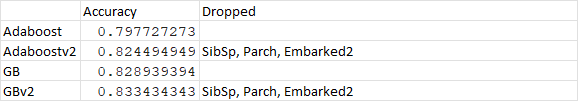

With this, I decided to try dropping other values to see what would be the most accurate.

In [ ]:
#adaboost pipeline (all major columns)
y = titanic['Survived']
X = titanic.drop(['PassengerId', 'Survived', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1)

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3333, random_state=42) 

AdaBoost = Pipeline([
    ('imp_mean', SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('scaler', StandardScaler()),
    ('AdaBoost', AdaBoostClassifier(random_state=42))

])

AdaBoost.fit(X_train, y_train)
scores = cross_val_score(AdaBoost, X_train, y_train, cv=10)
scores = scores.mean()
print('Adaboost accuracy(all):', scores)

#adaboost pipeline (Pclass, Age, and Sex)
y = titanic['Survived']
X = titanic.drop(['PassengerId', 'Survived', 'Name', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked', 'Embarked2'], axis=1)

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3333, random_state=42) 

AdaBoost2 = Pipeline([
    ('imp_mean', SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('scaler', StandardScaler()),
    ('AdaBoost', AdaBoostClassifier(random_state=42))

])

AdaBoost2.fit(X_train, y_train)
scores = cross_val_score(AdaBoost2, X_train, y_train, cv=10)
scores = scores.mean()
print('Adaboost accuracy(dropped SibSp, Parch, Embarked2):', scores)

#gradientboost pipeline (all)
y = titanic['Survived']
X = titanic.drop(['PassengerId', 'Survived', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1)

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3333, random_state=42) 

GradientBoost = Pipeline([
    ('imp_mean', SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('scaler', StandardScaler()),
    ('GradientBoost', GradientBoostingClassifier(random_state=42))

])

GradientBoost.fit(X_train, y_train)
GB_scores = cross_val_score(GradientBoost, X_train, y_train, cv=10)
GB_scores = GB_scores.mean()
print('GB accuracy(all):', GB_scores)

#gradientboost pipeline (Pclass, Age, Sex)
y = titanic['Survived']
X = titanic.drop(['PassengerId', 'Survived', 'Name', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked', 'Embarked2'], axis=1)

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3333, random_state=42) 

GradientBoost2 = Pipeline([
    ('imp_mean', SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('scaler', StandardScaler()),
    ('GradientBoost', GradientBoostingClassifier(random_state=42))

])

GradientBoost2.fit(X_train, y_train)
GB_scores = cross_val_score(GradientBoost2, X_train, y_train, cv=10)
GB_scores = GB_scores.mean()
print('GB accuracy(dropped SibSp, Parch, Embarked2):', GB_scores)



Adaboost accuracy(all): 0.7977272727272727
Adaboost accuracy(Pclass, Age, Sex): 0.8244949494949495
GB accuracy(all): 0.8289393939393939
GB accuracy(Pclass, Age, Sex): 0.8334343434343434


I ran the same test but also dropped Age2, along with another test that also dropped AdultChildMaleFemale. I added in the models where nothing was dropped for comparison, overall most of the models were improved for adaboost, though GB did not benefit when all 5 were dropped.

**Results**

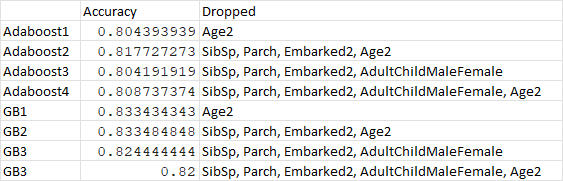

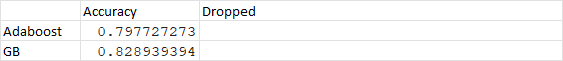

In [ ]:
#adaboost1 pipeline (all major columns)
y = titanic['Survived']
X = titanic.drop(['PassengerId', 'Survived', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'Age2'], axis=1)

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3333, random_state=42) 

AdaBoost = Pipeline([
    ('imp_mean', SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('scaler', StandardScaler()),
    ('AdaBoost', AdaBoostClassifier(random_state=42))

])

AdaBoost.fit(X_train, y_train)
scores = cross_val_score(AdaBoost, X_train, y_train, cv=10)
scores = scores.mean()
print('Adaboost1 accuracy(dropped Age2):', scores)

#adaboost2 pipeline (dropped SibSp, Parch, Embarked2, Age2)
y = titanic['Survived']
X = titanic.drop(['PassengerId', 'Survived', 'Name', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked', 'Embarked2', 'Age2'], axis=1)

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3333, random_state=42) 

AdaBoost2 = Pipeline([
    ('imp_mean', SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('scaler', StandardScaler()),
    ('AdaBoost', AdaBoostClassifier(random_state=42))

])

AdaBoost2.fit(X_train, y_train)
scores = cross_val_score(AdaBoost2, X_train, y_train, cv=10)
scores = scores.mean()
print('Adaboost accuracy2(dropped SibSp, Parch, Embarked2, Age2):', scores)

#adaboost3 pipeline (dropped SibSp, Parch, Embarked2, AdultChildMaleFemale)
y = titanic['Survived']
X = titanic.drop(['PassengerId', 'Survived', 'Name', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked', 'Embarked2', 'AdultChildMaleFemale'], axis=1)

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3333, random_state=42) 

AdaBoost2 = Pipeline([
    ('imp_mean', SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('scaler', StandardScaler()),
    ('AdaBoost', AdaBoostClassifier(random_state=42))

])

AdaBoost2.fit(X_train, y_train)
scores = cross_val_score(AdaBoost2, X_train, y_train, cv=10)
scores = scores.mean()
print('Adaboost3 accuracy(dropped SibSp, Parch, Embarked2, AdultChildMaleFemale):', scores)

#adaboost4 pipeline (dropped SibSp, Parch, Embarked2, AdultChildMaleFemale, Age2)
y = titanic['Survived']
X = titanic.drop(['PassengerId', 'Survived', 'Name', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked', 'Embarked2', 'AdultChildMaleFemale', 'Age2'], axis=1)

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3333, random_state=42) 

AdaBoost2 = Pipeline([
    ('imp_mean', SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('scaler', StandardScaler()),
    ('AdaBoost', AdaBoostClassifier(random_state=42))

])

AdaBoost2.fit(X_train, y_train)
scores = cross_val_score(AdaBoost2, X_train, y_train, cv=10)
scores = scores.mean()
print('Adaboost4 accuracy(dropped SibSp, Parch, Embarked2, AdultChildMaleFemale, Age2):', scores)

#gradientboost1 pipeline (dropped Age2)
y = titanic['Survived']
X = titanic.drop(['PassengerId', 'Survived', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'Age2'], axis=1)

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3333, random_state=42) 

GradientBoost = Pipeline([
    ('imp_mean', SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('scaler', StandardScaler()),
    ('GradientBoost', GradientBoostingClassifier(random_state=42))

])

GradientBoost.fit(X_train, y_train)
GB_scores = cross_val_score(GradientBoost, X_train, y_train, cv=10)
GB_scores = GB_scores.mean()
print('GB1 accuracy(dropped Age2):', GB_scores)

#gradientboost2 pipeline (dropped SibSp, Parch, Embarked2, Age2)
y = titanic['Survived']
X = titanic.drop(['PassengerId', 'Survived', 'Name', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked', 'Embarked2', 'Age2'], axis=1)

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3333, random_state=42) 

GradientBoost2 = Pipeline([
    ('imp_mean', SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('scaler', StandardScaler()),
    ('GradientBoost', GradientBoostingClassifier(random_state=42))

])

GradientBoost2.fit(X_train, y_train)
GB_scores = cross_val_score(GradientBoost2, X_train, y_train, cv=10)
GB_scores = GB_scores.mean()
print('GB2 accuracy(dropped SibSp, Parch, Embarked2, Age2):', GB_scores)

#gradientboost3 pipeline (dropped SibSp, Parch, Embarked2, AdultChildMaleFemale)
y = titanic['Survived']
X = titanic.drop(['PassengerId', 'Survived', 'Name', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked', 'Embarked2', 'AdultChildMaleFemale'], axis=1)

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3333, random_state=42) 

GradientBoost2 = Pipeline([
    ('imp_mean', SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('scaler', StandardScaler()),
    ('GradientBoost', GradientBoostingClassifier(random_state=42))

])

GradientBoost2.fit(X_train, y_train)
GB_scores = cross_val_score(GradientBoost2, X_train, y_train, cv=10)
GB_scores = GB_scores.mean()
print('GB3 accuracy(dropped SibSp, Parch, Embarked2, AdultChildMaleFemale):', GB_scores)

#gradientboost4 pipeline (dropped SibSp, Parch, Embarked2, AdultChildMaleFemale, Age2)
y = titanic['Survived']
X = titanic.drop(['PassengerId', 'Survived', 'Name', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked', 'Embarked2', 'AdultChildMaleFemale', 'Age2'], axis=1)

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3333, random_state=42) 

GradientBoost2 = Pipeline([
    ('imp_mean', SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('scaler', StandardScaler()),
    ('GradientBoost', GradientBoostingClassifier(random_state=42))

])

GradientBoost2.fit(X_train, y_train)
GB_scores = cross_val_score(GradientBoost2, X_train, y_train, cv=10)
GB_scores = GB_scores.mean()
print('GB accuracy4(dropped SibSp, Parch, Embarked2, AdultChildMaleFemale, Age2):', GB_scores)

Adaboost accuracy(all): 0.8043939393939393
Adaboost accuracy(dropped SibSp, Parch, Embarked2, Age2): 0.8177272727272727
Adaboost accuracy(dropped SibSp, Parch, Embarked2, AdultChildMaleFemale): 0.8041919191919191
Adaboost accuracy(dropped SibSp, Parch, Embarked2, AdultChildMaleFemale, Age2): 0.8087373737373736
GB accuracy(all): 0.8334343434343434
GB accuracy(dropped SibSp, Parch, Embarked2, Age2): 0.8334848484848486
GB accuracy(dropped SibSp, Parch, Embarked2, AdultChildMaleFemale): 0.8244444444444445
GB accuracy(dropped SibSp, Parch, Embarked2, AdultChildMaleFemale, Age2): 0.8200000000000001


I wanted to try and see if SibSp, Embarked2 or Parch caused innacuracies. So i made 3 more models to see how the accuracies changed. I also added in the models without anything dropped for comparison.

**Results**

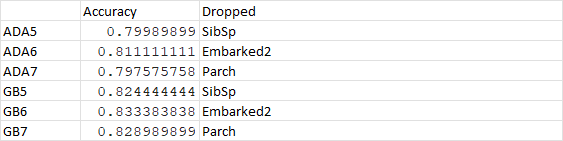

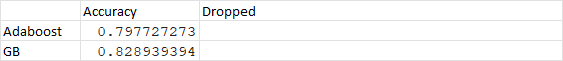

In [ ]:
#adaboost5 pipeline (dropped SibSp)
y = titanic['Survived']
X = titanic.drop(['PassengerId', 'Survived', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'SibSp'], axis=1)

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3333, random_state=42) 

AdaBoost = Pipeline([
    ('imp_mean', SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('scaler', StandardScaler()),
    ('AdaBoost', AdaBoostClassifier(random_state=42))

])

AdaBoost.fit(X_train, y_train)
scores = cross_val_score(AdaBoost, X_train, y_train, cv=10)
scores = scores.mean()
print('Adaboost5 accuracy(dropped SibSp):', scores)

#adaboost6 pipeline (dropped Embarked2)
y = titanic['Survived']
X = titanic.drop(['PassengerId', 'Survived', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'Embarked2'], axis=1)

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3333, random_state=42) 

AdaBoost = Pipeline([
    ('imp_mean', SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('scaler', StandardScaler()),
    ('AdaBoost', AdaBoostClassifier(random_state=42))

])

AdaBoost.fit(X_train, y_train)
scores = cross_val_score(AdaBoost, X_train, y_train, cv=10)
scores = scores.mean()
print('Adaboost6 accuracy(dropped Embarked2):', scores)

#adaboost7 pipeline (dropped Parch)
y = titanic['Survived']
X = titanic.drop(['PassengerId', 'Survived', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'Parch'], axis=1)

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3333, random_state=42) 

AdaBoost = Pipeline([
    ('imp_mean', SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('scaler', StandardScaler()),
    ('AdaBoost', AdaBoostClassifier(random_state=42))

])

AdaBoost.fit(X_train, y_train)
scores = cross_val_score(AdaBoost, X_train, y_train, cv=10)
scores = scores.mean()
print('Adaboost7 accuracy(dropped Parch):', scores)

#gradientboost5 pipeline (dropped SibSp)
y = titanic['Survived']
X = titanic.drop(['PassengerId', 'Survived', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'SibSp'], axis=1)

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3333, random_state=42) 

GradientBoost = Pipeline([
    ('imp_mean', SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('scaler', StandardScaler()),
    ('GradientBoost', GradientBoostingClassifier(random_state=42))

])

GradientBoost.fit(X_train, y_train)
GB_scores = cross_val_score(GradientBoost, X_train, y_train, cv=10)
GB_scores = GB_scores.mean()
print('GB5 accuracy(dropped SibSp):', GB_scores)

#gradientboost6 pipeline (dropped Embarked2)
y = titanic['Survived']
X = titanic.drop(['PassengerId', 'Survived', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'Embarked2'], axis=1)

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3333, random_state=42) 

GradientBoost = Pipeline([
    ('imp_mean', SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('scaler', StandardScaler()),
    ('GradientBoost', GradientBoostingClassifier(random_state=42))

])

GradientBoost.fit(X_train, y_train)
GB_scores = cross_val_score(GradientBoost, X_train, y_train, cv=10)
GB_scores = GB_scores.mean()
print('GB6 accuracy(dropped Embarked2):', GB_scores)

#gradientboost7 pipeline (dropped Parch)
y = titanic['Survived']
X = titanic.drop(['PassengerId', 'Survived', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'Parch'], axis=1)

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3333, random_state=42) 

GradientBoost = Pipeline([
    ('imp_mean', SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('scaler', StandardScaler()),
    ('GradientBoost', GradientBoostingClassifier(random_state=42))

])

GradientBoost.fit(X_train, y_train)
GB_scores = cross_val_score(GradientBoost, X_train, y_train, cv=10)
GB_scores = GB_scores.mean()
print('GB7 accuracy(dropped Parch):', GB_scores)

Because dropping Embarked2 seemed to have the best results out of the 3, I tried to combine that with dropping Age2 since dropping Age2 usually made the model more accurate than without it. Surprisingly, the results actually went down instead of up.

**Results**

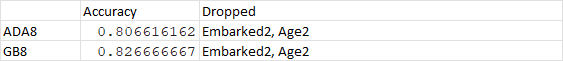

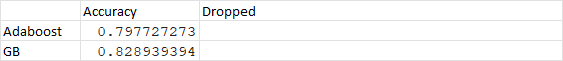

In [ ]:
#adaboost8 pipeline (dropped Embarked2, Age2)
y = titanic['Survived']
X = titanic.drop(['PassengerId', 'Survived', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'Embarked2', 'Age2'], axis=1)

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3333, random_state=42) 

AdaBoost = Pipeline([
    ('imp_mean', SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('scaler', StandardScaler()),
    ('AdaBoost', AdaBoostClassifier(random_state=42))

])

AdaBoost.fit(X_train, y_train)
scores = cross_val_score(AdaBoost, X_train, y_train, cv=10)
scores = scores.mean()
print('Adaboost8 accuracy(dropped Embarked2, Age2):', scores)

#gradientboost8 pipeline (dropped Embarked2, Age2)
y = titanic['Survived']
X = titanic.drop(['PassengerId', 'Survived', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'Embarked2', 'Age2'], axis=1)

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3333, random_state=42) 

GradientBoost = Pipeline([
    ('imp_mean', SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('scaler', StandardScaler()),
    ('GradientBoost', GradientBoostingClassifier(random_state=42))

])

GradientBoost.fit(X_train, y_train)
GB_scores = cross_val_score(GradientBoost, X_train, y_train, cv=10)
GB_scores = GB_scores.mean()
print('GB8 accuracy(dropped Embarked2, Age2):', GB_scores)

Adaboost8 accuracy(dropped Embarked2, Age2): 0.8066161616161616
GB8 accuracy(dropped Embarked2, Age2): 0.8266666666666668


I decided to run more models, I had completely forgotten to test the models without the mutliple Fare columns that I had created. Surprisingly, both performed differently depending on which Fares were dropped, but overall no GB model was more accurate than running without dropping anything. While Adaboost did improve, it still wasn't above any model that kept the Fares so far.

**Results**

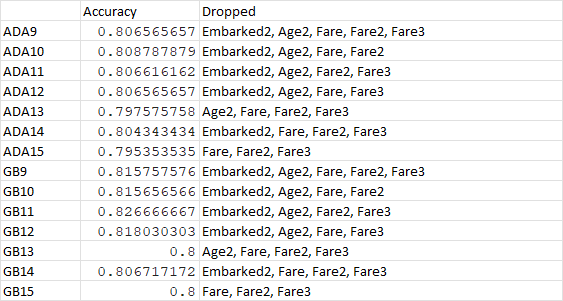

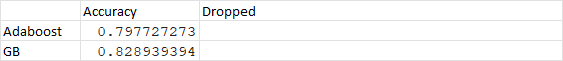

In [ ]:
#adaboost9 pipeline (dropped Embarked2, Age2, Fare, Fare2, Fare3)
y = titanic['Survived']
X = titanic.drop(['PassengerId', 'Survived', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'Embarked2', 'Age2', 'Fare', 'Fare2', 'Fare3'], axis=1)

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3333, random_state=42) 

AdaBoost = Pipeline([
    ('imp_mean', SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('scaler', StandardScaler()),
    ('AdaBoost', AdaBoostClassifier(random_state=42))

])

AdaBoost.fit(X_train, y_train)
scores = cross_val_score(AdaBoost, X_train, y_train, cv=10)
scores = scores.mean()
print('Adaboost9 accuracy(dropped Embarked2, Age2, Fare, Fare2, Fare3):', scores)

#adaboost10 pipeline (dropped Embarked2, Age2, Fare, Fare2)
y = titanic['Survived']
X = titanic.drop(['PassengerId', 'Survived', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'Embarked2', 'Age2', 'Fare', 'Fare2'], axis=1)

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3333, random_state=42) 

AdaBoost = Pipeline([
    ('imp_mean', SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('scaler', StandardScaler()),
    ('AdaBoost', AdaBoostClassifier(random_state=42))

])

AdaBoost.fit(X_train, y_train)
scores = cross_val_score(AdaBoost, X_train, y_train, cv=10)
scores = scores.mean()
print('Adaboost10 accuracy(dropped Embarked2, Age2, Fare, Fare2):', scores)

#adaboost11 pipeline (dropped Embarked2, Age2, Fare2, Fare3)
y = titanic['Survived']
X = titanic.drop(['PassengerId', 'Survived', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'Embarked2', 'Age2', 'Fare2', 'Fare3'], axis=1)

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3333, random_state=42) 

AdaBoost = Pipeline([
    ('imp_mean', SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('scaler', StandardScaler()),
    ('AdaBoost', AdaBoostClassifier(random_state=42))

])

AdaBoost.fit(X_train, y_train)
scores = cross_val_score(AdaBoost, X_train, y_train, cv=10)
scores = scores.mean()
print('Adaboost11 accuracy(dropped Embarked2, Age2, Fare2, Fare3):', scores)

#adaboost12 pipeline (dropped Embarked2, Age2, Fare, Fare3)
y = titanic['Survived']
X = titanic.drop(['PassengerId', 'Survived', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'Embarked2', 'Age2', 'Fare', 'Fare3'], axis=1)

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3333, random_state=42) 

AdaBoost = Pipeline([
    ('imp_mean', SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('scaler', StandardScaler()),
    ('AdaBoost', AdaBoostClassifier(random_state=42))

])

AdaBoost.fit(X_train, y_train)
scores = cross_val_score(AdaBoost, X_train, y_train, cv=10)
scores = scores.mean()
print('Adaboost12 accuracy(dropped Embarked2, Age2, Fare, Fare3):', scores)

#adaboost13 pipeline (dropped Age2, Fare, Fare2, Fare3)
y = titanic['Survived']
X = titanic.drop(['PassengerId', 'Survived', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'Age2', 'Fare', 'Fare2', 'Fare3'], axis=1)

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3333, random_state=42) 

AdaBoost = Pipeline([
    ('imp_mean', SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('scaler', StandardScaler()),
    ('AdaBoost', AdaBoostClassifier(random_state=42))

])

AdaBoost.fit(X_train, y_train)
scores = cross_val_score(AdaBoost, X_train, y_train, cv=10)
scores = scores.mean()
print('Adaboost13 accuracy(dropped Age2, Fare, Fare2, Fare3):', scores)

#adaboost14 pipeline (dropped Embarked2, Fare, Fare2, Fare3)
y = titanic['Survived']
X = titanic.drop(['PassengerId', 'Survived', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'Embarked2', 'Fare', 'Fare2', 'Fare3'], axis=1)

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3333, random_state=42) 

AdaBoost = Pipeline([
    ('imp_mean', SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('scaler', StandardScaler()),
    ('AdaBoost', AdaBoostClassifier(random_state=42))

])

AdaBoost.fit(X_train, y_train)
scores = cross_val_score(AdaBoost, X_train, y_train, cv=10)
scores = scores.mean()
print('Adaboost14 accuracy(dropped Embarked2, Fare, Fare2, Fare3):', scores)

#adaboost15 pipeline (dropped Fare, Fare2, Fare3)
y = titanic['Survived']
X = titanic.drop(['PassengerId', 'Survived', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'Fare', 'Fare2', 'Fare3'], axis=1)

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3333, random_state=42) 

AdaBoost = Pipeline([
    ('imp_mean', SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('scaler', StandardScaler()),
    ('AdaBoost', AdaBoostClassifier(random_state=42))

])

AdaBoost.fit(X_train, y_train)
scores = cross_val_score(AdaBoost, X_train, y_train, cv=10)
scores = scores.mean()
print('Adaboost15 accuracy(dropped Fare, Fare2, Fare3):', scores)

#gradientboost9 pipeline (dropped Embarked2, Age2, Fare, Fare2, Fare3)
y = titanic['Survived']
X = titanic.drop(['PassengerId', 'Survived', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'Embarked2', 'Age2', 'Fare', 'Fare2', 'Fare3'], axis=1)

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3333, random_state=42) 

GradientBoost = Pipeline([
    ('imp_mean', SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('scaler', StandardScaler()),
    ('GradientBoost', GradientBoostingClassifier(random_state=42))

])

GradientBoost.fit(X_train, y_train)
GB_scores = cross_val_score(GradientBoost, X_train, y_train, cv=10)
GB_scores = GB_scores.mean()
print('GB9 accuracy(dropped Embarked2, Age2, Fare, Fare2, Fare3):', GB_scores)

#gradientboost10 pipeline (dropped Embarked2, Age2, Fare, Fare2)
y = titanic['Survived']
X = titanic.drop(['PassengerId', 'Survived', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'Embarked2', 'Age2', 'Fare', 'Fare2'], axis=1)

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3333, random_state=42) 

GradientBoost = Pipeline([
    ('imp_mean', SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('scaler', StandardScaler()),
    ('GradientBoost', GradientBoostingClassifier(random_state=42))

])

GradientBoost.fit(X_train, y_train)
GB_scores = cross_val_score(GradientBoost, X_train, y_train, cv=10)
GB_scores = GB_scores.mean()
print('GB10 accuracy(dropped Embarked2, Age2, Fare, Fare2):', GB_scores)

#gradientboost11 pipeline (dropped Embarked2, Age2, Fare, Fare2)
y = titanic['Survived']
X = titanic.drop(['PassengerId', 'Survived', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'Embarked2', 'Age2', 'Fare2', 'Fare3'], axis=1)

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3333, random_state=42) 

GradientBoost = Pipeline([
    ('imp_mean', SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('scaler', StandardScaler()),
    ('GradientBoost', GradientBoostingClassifier(random_state=42))

])

GradientBoost.fit(X_train, y_train)
GB_scores = cross_val_score(GradientBoost, X_train, y_train, cv=10)
GB_scores = GB_scores.mean()
print('GB11 accuracy(dropped Embarked2, Age2, Fare2, Fare3):', GB_scores)

#gradientboost12 pipeline (dropped Embarked2, Age2, Fare2)
y = titanic['Survived']
X = titanic.drop(['PassengerId', 'Survived', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'Embarked2', 'Age2', 'Fare', 'Fare3'], axis=1)

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3333, random_state=42) 

GradientBoost = Pipeline([
    ('imp_mean', SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('scaler', StandardScaler()),
    ('GradientBoost', GradientBoostingClassifier(random_state=42))

])

GradientBoost.fit(X_train, y_train)
GB_scores = cross_val_score(GradientBoost, X_train, y_train, cv=10)
GB_scores = GB_scores.mean()
print('GB12 accuracy(dropped Embarked2, Age2, Fare, Fare3):', GB_scores)

#gradientboost13 pipeline (dropped Age2, Fare, Fare2, Fare3)
y = titanic['Survived']
X = titanic.drop(['PassengerId', 'Survived', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'Age2', 'Fare', 'Fare2', 'Fare3'], axis=1)

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3333, random_state=42) 

GradientBoost = Pipeline([
    ('imp_mean', SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('scaler', StandardScaler()),
    ('GradientBoost', GradientBoostingClassifier(random_state=42))

])

GradientBoost.fit(X_train, y_train)
GB_scores = cross_val_score(GradientBoost, X_train, y_train, cv=10)
GB_scores = GB_scores.mean()
print('GB13 accuracy(dropped Age2, Fare, Fare2, Fare3):', GB_scores)

#gradientboost14 pipeline (dropped Embarked2, Fare, Fare2, Fare3)
y = titanic['Survived']
X = titanic.drop(['PassengerId', 'Survived', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'Embarked2', 'Fare', 'Fare2', 'Fare3'], axis=1)

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3333, random_state=42) 

GradientBoost = Pipeline([
    ('imp_mean', SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('scaler', StandardScaler()),
    ('GradientBoost', GradientBoostingClassifier(random_state=42))

])

GradientBoost.fit(X_train, y_train)
GB_scores = cross_val_score(GradientBoost, X_train, y_train, cv=10)
GB_scores = GB_scores.mean()
print('GB14 accuracy(dropped Embarked2, Fare, Fare2, Fare3):', GB_scores)

#gradientboost15 pipeline (dropped Fare, Fare2, Fare3)
y = titanic['Survived']
X = titanic.drop(['PassengerId', 'Survived', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'Age2', 'Fare', 'Fare2', 'Fare3'], axis=1)

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3333, random_state=42) 

GradientBoost = Pipeline([
    ('imp_mean', SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('scaler', StandardScaler()),
    ('GradientBoost', GradientBoostingClassifier(random_state=42))

])

GradientBoost.fit(X_train, y_train)
GB_scores = cross_val_score(GradientBoost, X_train, y_train, cv=10)
GB_scores = GB_scores.mean()
print('GB14 accuracy(dropped Fare, Fare2, Fare3):', GB_scores)

Adaboost9 accuracy(dropped Embarked2, Age2, Fare, Fare2, Fare3): 0.8065656565656566
Adaboost10 accuracy(dropped Embarked2, Age2, Fare, Fare2): 0.8087878787878788
Adaboost11 accuracy(dropped Embarked2, Age2, Fare2, Fare3): 0.8066161616161616
Adaboost12 accuracy(dropped Embarked2, Age2, Fare, Fare3): 0.8065656565656566
Adaboost13 accuracy(dropped Age2, Fare, Fare2, Fare3): 0.7975757575757575
Adaboost14 accuracy(dropped Embarked2, Fare, Fare2, Fare3): 0.8043434343434344
Adaboost15 accuracy(dropped Fare, Fare2, Fare3): 0.7953535353535353
GB9 accuracy(dropped Embarked2, Age2, Fare, Fare2, Fare3): 0.8157575757575757
GB10 accuracy(dropped Embarked2, Age2, Fare, Fare2): 0.8156565656565657
GB11 accuracy(dropped Embarked2, Age2, Fare2, Fare3): 0.8266666666666668
GB12 accuracy(dropped Embarked2, Age2, Fare, Fare3): 0.818030303030303
GB13 accuracy(dropped Age2, Fare, Fare2, Fare3): 0.8
GB14 accuracy(dropped Embarked2, Fare, Fare2, Fare3): 0.8067171717171716
GB14 accuracy(dropped Fare, Fare2, Fare3

While looking up parameters for GradientBoosting, in the page it suggested trying HistGradientClassifier as an alternative, so I ran my best results through HistGradeitnClassifier to see what came up.

**Results**

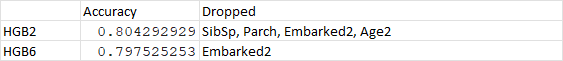

In [ ]:
#histgradientboost2 pipeline (dropped SibSp, Parch, Embarked2, Age2)
y = titanic['Survived']
X = titanic.drop(['PassengerId', 'Survived', 'Name', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked', 'Embarked2', 'Age2'], axis=1)

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3333, random_state=42) 

GradientBoost2 = Pipeline([
    ('imp_mean', SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('scaler', StandardScaler()),
    ('HistGradientBoost', HistGradientBoostingClassifier(random_state=42))

])

GradientBoost2.fit(X_train, y_train)
GB_scores = cross_val_score(GradientBoost2, X_train, y_train, cv=10)
GB_scores = GB_scores.mean()
print('HGB2 accuracy(dropped SibSp, Parch, Embarked2, Age2):', GB_scores)

#histgradientboost6 pipeline (dropped Embarked2)
y = titanic['Survived']
X = titanic.drop(['PassengerId', 'Survived', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'Embarked2'], axis=1)

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3333, random_state=42) 

GradientBoost = Pipeline([
    ('imp_mean', SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('scaler', StandardScaler()),
    ('HistGradientBoost', HistGradientBoostingClassifier(random_state=42))

])

GradientBoost.fit(X_train, y_train)
GB_scores = cross_val_score(GradientBoost, X_train, y_train, cv=10)
GB_scores = GB_scores.mean()
print('HGB6 accuracy(dropped Embarked2):', GB_scores)

HGB2 accuracy(dropped SibSp, Parch, Embarked2, Age2): 0.8042929292929293
HGB6 accuracy(dropped Embarked2): 0.7975252525252525


In [ ]:
#gradientboost16 pipeline (dropped SibSp, Embarked2, Age2)
y = titanic['Survived']
X = titanic.drop(['PassengerId', 'Survived', 'Name', 'Sex', 'SibSp', 'Ticket', 'Cabin', 'Embarked', 'Embarked2', 'Age2'], axis=1)

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3333, random_state=42) 

GradientBoost2 = Pipeline([
    ('imp_mean', SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('scaler', StandardScaler()),
    ('GradientBoost', GradientBoostingClassifier(random_state=42))

])

GradientBoost2.fit(X_train, y_train)
GB_scores = cross_val_score(GradientBoost2, X_train, y_train, cv=10)
GB_scores = GB_scores.mean()
print('GB16 accuracy(dropped SibSp, Embarked2, Age2):', GB_scores)

#gradientboost17 pipeline (dropped Embarked2)
y = titanic['Survived']
X = titanic.drop(['PassengerId', 'Survived', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'Embarked2', 'SibSp', 'Fare', 'Fare3'], axis=1)

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3333, random_state=42) 

GradientBoost = Pipeline([
    ('imp_mean', SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('scaler', StandardScaler()),
    ('GradientBoost', GradientBoostingClassifier(random_state=42))

])

GradientBoost.fit(X_train, y_train)
GB_scores = cross_val_score(GradientBoost, X_train, y_train, cv=10)
GB_scores = GB_scores.mean()
print('GB17 accuracy(dropped Embarked2, SibSp, Fare, Fare3):', GB_scores)

#gradientboost18 pipeline (dropped SibSp, Embarked2, Age2)
y = titanic['Survived']
X = titanic.drop(['PassengerId', 'Survived', 'Name', 'Sex', 'SibSp', 'Ticket', 'Cabin', 'Embarked', 'Embarked2', 'Age2', 'Fare'], axis=1)

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3333, random_state=42) 

GradientBoost2 = Pipeline([
    ('imp_mean', SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('scaler', StandardScaler()),
    ('GradientBoost', GradientBoostingClassifier(random_state=42))

])

GradientBoost2.fit(X_train, y_train)
GB_scores = cross_val_score(GradientBoost2, X_train, y_train, cv=10)
GB_scores = GB_scores.mean()
print('GB18 accuracy(dropped SibSp, Embarked2, Age2, Fare):', GB_scores)

#gradientboost19 pipeline (dropped SibSp, Embarked2, Age2)
y = titanic['Survived']
X = titanic.drop(['PassengerId', 'Survived', 'Name', 'Sex', 'SibSp', 'Ticket', 'Cabin', 'Embarked', 'Embarked2', 'Age2', 'Fare3'], axis=1)

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3333, random_state=42) 

GradientBoost2 = Pipeline([
    ('imp_mean', SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('scaler', StandardScaler()),
    ('GradientBoost', GradientBoostingClassifier(random_state=42))

])

GradientBoost2.fit(X_train, y_train)
GB_scores = cross_val_score(GradientBoost2, X_train, y_train, cv=10)
GB_scores = GB_scores.mean()
print('GB19 accuracy(dropped SibSp, Embarked2, Age2, Fare3):', GB_scores)

#gradientboost20 pipeline (dropped Embarked2)
y = titanic['Survived']
X = titanic.drop(['PassengerId', 'Survived', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'Embarked2', 'SibSp', 'Fare', 'Fare2', 'Fare3'], axis=1)

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3333, random_state=42) 

GradientBoost = Pipeline([
    ('imp_mean', SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('scaler', StandardScaler()),
    ('GradientBoost', GradientBoostingClassifier(random_state=42))

])

GradientBoost.fit(X_train, y_train)
GB_scores = cross_val_score(GradientBoost, X_train, y_train, cv=10)
GB_scores = GB_scores.mean()
print('GB20 accuracy(dropped Embarked2, SibSp, Fare, Fare2, Fare3):', GB_scores)

GB16 accuracy(dropped SibSp, Embarked2, Age2): 0.8312121212121213
GB17 accuracy(dropped Embarked2, SibSp, Fare, Fare3): 0.8134343434343434
GB18 accuracy(dropped SibSp, Embarked2, Age2, Fare): 0.8088888888888889
GB19 accuracy(dropped SibSp, Embarked2, Age2, Fare3): 0.8312121212121213
GB20 accuracy(dropped Embarked2, SibSp, Fare, Fare2, Fare3): 0.8021717171717171


Created 5 new models, surprisngly best ones were the ones that I dropped Age2. I want to test with more models based on dropping Age2 and possibly all the fares to see how much it changes.

**Results**

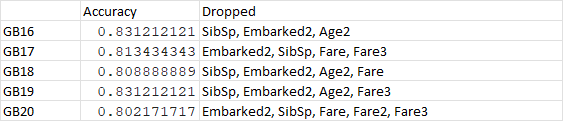

In [ ]:
#gradientboost21 pipeline (dropped SibSp, Embarked2)
y = titanic['Survived']
X = titanic.drop(['PassengerId', 'Survived', 'Name', 'Sex', 'SibSp', 'Ticket', 'Cabin', 'Embarked', 'Embarked2'], axis=1)

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3333, random_state=42) 

GradientBoost2 = Pipeline([
    ('imp_mean', SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('scaler', StandardScaler()),
    ('GradientBoost', GradientBoostingClassifier(random_state=42))

])

GradientBoost2.fit(X_train, y_train)
GB_scores = cross_val_score(GradientBoost2, X_train, y_train, cv=10)
GB_scores = GB_scores.mean()
print('GB21 accuracy(dropped SibSp, Embarked2):', GB_scores)

#gradientboost22 pipeline (dropped Age2, Embarked2)
y = titanic['Survived']
X = titanic.drop(['PassengerId', 'Survived', 'Name', 'Sex', 'Age2', 'Ticket', 'Cabin', 'Embarked', 'Embarked2'], axis=1)

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3333, random_state=42) 

GradientBoost2 = Pipeline([
    ('imp_mean', SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('scaler', StandardScaler()),
    ('GradientBoost', GradientBoostingClassifier(random_state=42))

])

GradientBoost2.fit(X_train, y_train)
GB_scores = cross_val_score(GradientBoost2, X_train, y_train, cv=10)
GB_scores = GB_scores.mean()
print('GB22 accuracy(dropped Age2, Embarked2):', GB_scores)

#gradientboost23 pipeline (dropped SibSp, Embarked2, Parch)
y = titanic['Survived']
X = titanic.drop(['PassengerId', 'Survived', 'Name', 'Sex', 'SibSp', 'Ticket', 'Cabin', 'Embarked', 'Embarked2', 'Parch'], axis=1)

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3333, random_state=42) 

GradientBoost2 = Pipeline([
    ('imp_mean', SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('scaler', StandardScaler()),
    ('GradientBoost', GradientBoostingClassifier(random_state=42))

])

GradientBoost2.fit(X_train, y_train)
GB_scores = cross_val_score(GradientBoost2, X_train, y_train, cv=10)
GB_scores = GB_scores.mean()
print('GB23 accuracy(dropped SibSp, Embarked2, Parch):', GB_scores)

#gradientboost24 pipeline (dropped Age2, Embarked2, Parch)
y = titanic['Survived']
X = titanic.drop(['PassengerId', 'Survived', 'Name', 'Sex', 'Age2', 'Ticket', 'Cabin', 'Embarked', 'Embarked2', 'Parch'], axis=1)

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3333, random_state=42) 

GradientBoost2 = Pipeline([
    ('imp_mean', SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('scaler', StandardScaler()),
    ('GradientBoost', GradientBoostingClassifier(random_state=42))

])

GradientBoost2.fit(X_train, y_train)
GB_scores = cross_val_score(GradientBoost2, X_train, y_train, cv=10)
GB_scores = GB_scores.mean()
print('GB24 accuracy(dropped Age2, Embarked2, Parch):', GB_scores)

#gradientboost25 pipeline (dropped SibSp, Embarked2, Age2, Parch)
y = titanic['Survived']
X = titanic.drop(['PassengerId', 'Survived', 'Name', 'Sex', 'SibSp', 'Ticket', 'Cabin', 'Embarked', 'Embarked2', 'Age2', 'Parch'], axis=1)

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3333, random_state=42) 

GradientBoost2 = Pipeline([
    ('imp_mean', SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('scaler', StandardScaler()),
    ('GradientBoost', GradientBoostingClassifier(random_state=42))

])

GradientBoost2.fit(X_train, y_train)
GB_scores = cross_val_score(GradientBoost2, X_train, y_train, cv=10)
GB_scores = GB_scores.mean()
print('GB25 accuracy(dropped SibSp, Embarked2, Age2, Parch):', GB_scores)

#gradientboost26 pipeline (dropped Embarked2, SibSp, Fare, Fare3, Parch)
y = titanic['Survived']
X = titanic.drop(['PassengerId', 'Survived', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'Embarked2', 'SibSp', 'Fare', 'Fare3', 'Parch'], axis=1)

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3333, random_state=42) 

GradientBoost = Pipeline([
    ('imp_mean', SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('scaler', StandardScaler()),
    ('GradientBoost', GradientBoostingClassifier(random_state=42))

])

GradientBoost.fit(X_train, y_train)
GB_scores = cross_val_score(GradientBoost, X_train, y_train, cv=10)
GB_scores = GB_scores.mean()
print('GB26 accuracy(dropped Embarked2, SibSp, Fare, Fare3, Parch):', GB_scores)

#gradientboost27 pipeline (dropped SibSp, Embarked2, Age2, Fare, Parch)
y = titanic['Survived']
X = titanic.drop(['PassengerId', 'Survived', 'Name', 'Sex', 'SibSp', 'Ticket', 'Cabin', 'Embarked', 'Embarked2', 'Age2', 'Fare', 'Parch'], axis=1)

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3333, random_state=42) 

GradientBoost2 = Pipeline([
    ('imp_mean', SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('scaler', StandardScaler()),
    ('GradientBoost', GradientBoostingClassifier(random_state=42))

])

GradientBoost2.fit(X_train, y_train)
GB_scores = cross_val_score(GradientBoost2, X_train, y_train, cv=10)
GB_scores = GB_scores.mean()
print('GB27 accuracy(dropped SibSp, Embarked2, Age2, Fare, Parch):', GB_scores)

#gradientboost28 pipeline (dropped SibSp, Embarked2, Age2, Fare3, Parch)
y = titanic['Survived']
X = titanic.drop(['PassengerId', 'Survived', 'Name', 'Sex', 'SibSp', 'Ticket', 'Cabin', 'Embarked', 'Embarked2', 'Age2', 'Fare3', 'Parch'], axis=1)

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3333, random_state=42) 

GradientBoost2 = Pipeline([
    ('imp_mean', SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('scaler', StandardScaler()),
    ('GradientBoost', GradientBoostingClassifier(random_state=42))

])

GradientBoost2.fit(X_train, y_train)
GB_scores = cross_val_score(GradientBoost2, X_train, y_train, cv=10)
GB_scores = GB_scores.mean()
print('GB28 accuracy(dropped SibSp, Embarked2, Age2, Fare3, Parch):', GB_scores)

#gradientboost29 pipeline (dropped Embarked2, SibSp, Fare, Fare2, Fare3, Parch)
y = titanic['Survived']
X = titanic.drop(['PassengerId', 'Survived', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'Embarked2', 'SibSp', 'Fare', 'Fare2', 'Fare3', 'Parch'], axis=1)

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3333, random_state=42) 

GradientBoost = Pipeline([
    ('imp_mean', SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('scaler', StandardScaler()),
    ('GradientBoost', GradientBoostingClassifier(random_state=42))

])

GradientBoost.fit(X_train, y_train)
GB_scores = cross_val_score(GradientBoost, X_train, y_train, cv=10)
GB_scores = GB_scores.mean()
print('GB29 accuracy(dropped Embarked2, SibSp, Fare, Fare2, Fare3, Parch):', GB_scores)

GB21 accuracy(dropped SibSp, Embarked2): 0.8267171717171717
GB22 accuracy(dropped Age2, Embarked2): 0.8266666666666668
GB23 accuracy(dropped SibSp, Embarked2, Parch): 0.8334343434343434
GB24 accuracy(dropped Age2, Embarked2, Parch): 0.828989898989899
GB25 accuracy(dropped SibSp, Embarked2, Age2, Parch): 0.8334848484848486
GB26 accuracy(dropped Embarked2, SibSp, Fare, Fare3, Parch): 0.8111616161616162
GB27 accuracy(dropped SibSp, Embarked2, Age2, Fare, Parch): 0.8042424242424241
GB28 accuracy(dropped SibSp, Embarked2, Age2, Fare3, Parch): 0.8312121212121213
GB29 accuracy(dropped Embarked2, SibSp, Fare, Fare2, Fare3, Parch): 0.8133838383838384


I removed a few measures but for the most part, only 1 was noteworthy. Model 25 was also a good model but because I hadn't been keeping track of my models well enough, I didn't realize til after that it was a repeat of GB in a different order.

**Results**

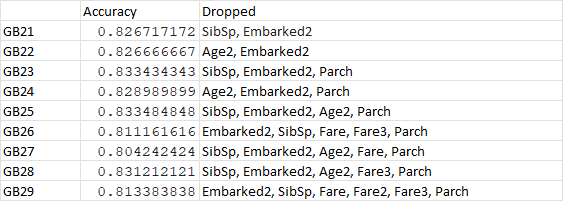


**Best GB Models**

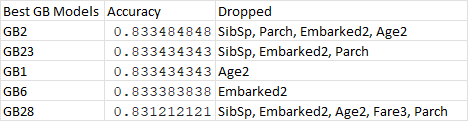



In [ ]:
#gradientboost30 pipeline (dropped SibSp, Parch, Embarked2, Age2, Fare3)
y = titanic['Survived']
X = titanic.drop(['PassengerId', 'Survived', 'Name', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked', 'Embarked2', 'Age2', 'Fare3'], axis=1)

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3333, random_state=42) 

GradientBoost2 = Pipeline([
    ('imp_mean', SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('scaler', StandardScaler()),
    ('GradientBoost', GradientBoostingClassifier(random_state=42))

])

GradientBoost2.fit(X_train, y_train)
GB_scores = cross_val_score(GradientBoost2, X_train, y_train, cv=10)
GB_scores = GB_scores.mean()
print('GB30 accuracy(dropped SibSp, Parch, Embarked2, Age2, Fare3):', GB_scores)

#gradientboost31 pipeline (dropped SibSp, Parch, Embarked2, Age2, Fare, Fare3)
y = titanic['Survived']
X = titanic.drop(['PassengerId', 'Survived', 'Name', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked', 'Embarked2', 'Age2', 'Fare', 'Fare3'], axis=1)

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3333, random_state=42) 

GradientBoost2 = Pipeline([
    ('imp_mean', SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('scaler', StandardScaler()),
    ('GradientBoost', GradientBoostingClassifier(random_state=42))

])

GradientBoost2.fit(X_train, y_train)
GB_scores = cross_val_score(GradientBoost2, X_train, y_train, cv=10)
GB_scores = GB_scores.mean()
print('GB31 accuracy(dropped SibSp, Parch, Embarked2, Age2, Fare, Fare3):', GB_scores)

GB30 accuracy(dropped SibSp, Parch, Embarked2, Age2, Fare3): 0.8312121212121213
GB31 accuracy(dropped SibSp, Parch, Embarked2, Age2, Fare, Fare3): 0.8111616161616162


In [ ]:
#gradientboost32 pipeline (dropped SibSp, Parch, Embarked2, Age2, AdultChildMaleFemale)
y = titanic['Survived']
X = titanic.drop(['PassengerId', 'Survived', 'Name', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked', 'Embarked2', 'Age2', 'AdultChildMaleFemale'], axis=1)

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3333, random_state=42) 

GradientBoost2 = Pipeline([
    ('imp_mean', SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('scaler', StandardScaler()),
    ('GradientBoost', GradientBoostingClassifier(random_state=42))

])

GradientBoost2.fit(X_train, y_train)
GB_scores = cross_val_score(GradientBoost2, X_train, y_train, cv=10)
GB_scores = GB_scores.mean()
print('GB32 accuracy(dropped SibSp, Parch, Embarked2, Age2, AdultChildMaleFemale):', GB_scores)

#gradientboost33 pipeline (dropped SibSp, Parch, Embarked2, AdultChildMaleFemale)
y = titanic['Survived']
X = titanic.drop(['PassengerId', 'Survived', 'Name', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked', 'Embarked2', 'AdultChildMaleFemale'], axis=1)

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3333, random_state=42) 

GradientBoost2 = Pipeline([
    ('imp_mean', SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('scaler', StandardScaler()),
    ('GradientBoost', GradientBoostingClassifier(random_state=42))

])

GradientBoost2.fit(X_train, y_train)
GB_scores = cross_val_score(GradientBoost2, X_train, y_train, cv=10)
GB_scores = GB_scores.mean()
print('GB33 accuracy(dropped SibSp, Parch, Embarked2, AdultChildMaleFemale):', GB_scores)

#gradientboost34 pipeline (dropped SibSp, Parch, Embarked2, AdultChildMaleFemale, Fare3)
y = titanic['Survived']
X = titanic.drop(['PassengerId', 'Survived', 'Name', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked', 'Embarked2', 'AdultChildMaleFemale', 'Fare3'], axis=1)

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3333, random_state=42) 

GradientBoost2 = Pipeline([
    ('imp_mean', SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('scaler', StandardScaler()),
    ('GradientBoost', GradientBoostingClassifier(random_state=42))

])

GradientBoost2.fit(X_train, y_train)
GB_scores = cross_val_score(GradientBoost2, X_train, y_train, cv=10)
GB_scores = GB_scores.mean()
print('GB34 accuracy(dropped SibSp, Parch, Embarked2, AdultChildMaleFemale, Fare3):', GB_scores)

#gradientboost35 pipeline (dropped SibSp, Parch, Embarked2, AdultChildMaleFemale, Fare3, Fare)
y = titanic['Survived']
X = titanic.drop(['PassengerId', 'Survived', 'Name', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked', 'Embarked2', 'AdultChildMaleFemale', 'Fare3', 'Fare'], axis=1)

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3333, random_state=42) 

GradientBoost2 = Pipeline([
    ('imp_mean', SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('scaler', StandardScaler()),
    ('GradientBoost', GradientBoostingClassifier(random_state=42))

])

GradientBoost2.fit(X_train, y_train)
GB_scores = cross_val_score(GradientBoost2, X_train, y_train, cv=10)
GB_scores = GB_scores.mean()
print('GB35 accuracy(dropped SibSp, Parch, Embarked2, AdultChildMaleFemale, Fare3, Fare):', GB_scores)

GB32 accuracy(dropped SibSp, Parch, Embarked2, Age2, AdultChildMaleFemale): 0.8200000000000001
GB33 accuracy(dropped SibSp, Parch, Embarked2, AdultChildMaleFemale): 0.8244444444444445
GB34 accuracy(dropped SibSp, Parch, Embarked2, AdultChildMaleFemale, Fare3): 0.8244444444444445
GB35 accuracy(dropped SibSp, Parch, Embarked2, AdultChildMaleFemale, Fare3, Fare): 0.8111111111111111


In [ ]:
#gradientboost36 pipeline (dropped SibSp, Embarked2, AdultChildMaleFemale, Fare3, Fare)
y = titanic['Survived']
X = titanic.drop(['PassengerId', 'Survived', 'Name', 'Sex', 'SibSp', 'Ticket', 'Cabin', 'Embarked', 'Embarked2', 'AdultChildMaleFemale', 'Fare3', 'Fare'], axis=1)

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3333, random_state=42) 

GradientBoost2 = Pipeline([
    ('imp_mean', SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('scaler', StandardScaler()),
    ('GradientBoost', GradientBoostingClassifier(random_state=42))

])

GradientBoost2.fit(X_train, y_train)
GB_scores = cross_val_score(GradientBoost2, X_train, y_train, cv=10)
GB_scores = GB_scores.mean()
print('GB36 accuracy(dropped SibSp, Embarked2, AdultChildMaleFemale, Fare3, Fare):', GB_scores)

#gradientboost37 pipeline (dropped SibSp, Embarked2, AdultChildMaleFemale, Fare3)
y = titanic['Survived']
X = titanic.drop(['PassengerId', 'Survived', 'Name', 'Sex', 'SibSp', 'Ticket', 'Cabin', 'Embarked', 'Embarked2', 'AdultChildMaleFemale', 'Fare3'], axis=1)

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3333, random_state=42) 

GradientBoost2 = Pipeline([
    ('imp_mean', SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('scaler', StandardScaler()),
    ('GradientBoost', GradientBoostingClassifier(random_state=42))

])

GradientBoost2.fit(X_train, y_train)
GB_scores = cross_val_score(GradientBoost2, X_train, y_train, cv=10)
GB_scores = GB_scores.mean()
print('GB37 accuracy(dropped SibSp, Embarked2, AdultChildMaleFemale, Fare3):', GB_scores)

GB36 accuracy(dropped SibSp, Embarked2, AdultChildMaleFemale, Fare3, Fare): 0.8133333333333332
GB37 accuracy(dropped SibSp, Embarked2, AdultChildMaleFemale, Fare3): 0.8222222222222223


In [ ]:
#gradientboost38 pipeline (dropped SibSp, Parch, Embarked2, Age2, Fare2)
y = titanic['Survived']
X = titanic.drop(['PassengerId', 'Survived', 'Name', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked', 'Embarked2', 'Age2', 'Fare2'], axis=1)

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3333, random_state=42) 

GradientBoost2 = Pipeline([
    ('imp_mean', SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('scaler', StandardScaler()),
    ('GradientBoost', GradientBoostingClassifier(random_state=42))

])

GradientBoost2.fit(X_train, y_train)
GB_scores = cross_val_score(GradientBoost2, X_train, y_train, cv=10)
GB_scores = GB_scores.mean()
print('GB38 accuracy(dropped SibSp, Parch, Embarked2, Age2, Fare2):', GB_scores)

#gradientboost39 pipeline (dropped SibSp, Parch, Embarked2, Age2, Fare2, Fare3)
y = titanic['Survived']
X = titanic.drop(['PassengerId', 'Survived', 'Name', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked', 'Embarked2', 'Age2', 'Fare2', 'Fare3'], axis=1)

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3333, random_state=42) 

GradientBoost2 = Pipeline([
    ('imp_mean', SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('scaler', StandardScaler()),
    ('GradientBoost', GradientBoostingClassifier(random_state=42))

])

GradientBoost2.fit(X_train, y_train)
GB_scores = cross_val_score(GradientBoost2, X_train, y_train, cv=10)
GB_scores = GB_scores.mean()
print('GB39 accuracy(dropped SibSp, Parch, Embarked2, Age2, Fare2, Fare3):', GB_scores)

#gradientboost40 pipeline (dropped SibSp, Parch, Embarked2, Age2, Fare, Fare2, Fare3)
y = titanic['Survived']
X = titanic.drop(['PassengerId', 'Survived', 'Name', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked', 'Embarked2', 'Age2', 'Fare', 'Fare2', 'Fare3'], axis=1)

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3333, random_state=42) 

GradientBoost2 = Pipeline([
    ('imp_mean', SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('scaler', StandardScaler()),
    ('GradientBoost', GradientBoostingClassifier(random_state=42))

])

GradientBoost2.fit(X_train, y_train)
GB_scores = cross_val_score(GradientBoost2, X_train, y_train, cv=10)
GB_scores = GB_scores.mean()
print('GB40 accuracy(dropped SibSp, Parch, Embarked2, Age2, Fare, Fare2, Fare3):', GB_scores)

GB38 accuracy(dropped SibSp, Parch, Embarked2, Age2, Fare2): 0.8312121212121213
GB39 accuracy(dropped SibSp, Parch, Embarked2, Age2, Fare2, Fare3): 0.8312121212121213
GB39 accuracy(dropped SibSp, Parch, Embarked2, Age2, Fare2, Fare3): 0.817929292929293


In [ ]:
#gradientboost41 pipeline (dropped SibSp, Parch, Embarked2, Age2, Age)
y = titanic['Survived']
X = titanic.drop(['PassengerId', 'Survived', 'Name', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked', 'Embarked2', 'Age2', 'Age'], axis=1)

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3333, random_state=42) 

GradientBoost2 = Pipeline([
    ('imp_mean', SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('scaler', StandardScaler()),
    ('GradientBoost', GradientBoostingClassifier(random_state=42))

])

GradientBoost2.fit(X_train, y_train)
GB_scores = cross_val_score(GradientBoost2, X_train, y_train, cv=10)
GB_scores = GB_scores.mean()
print('GB41 accuracy(dropped SibSp, Parch, Embarked2, Age2, Age):', GB_scores)

#gradientboost42 pipeline (dropped SibSp, Parch, Embarked2, Age)
y = titanic['Survived']
X = titanic.drop(['PassengerId', 'Survived', 'Name', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked', 'Embarked2', 'Age'], axis=1)

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3333, random_state=42) 

GradientBoost2 = Pipeline([
    ('imp_mean', SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('scaler', StandardScaler()),
    ('GradientBoost', GradientBoostingClassifier(random_state=42))

])

GradientBoost2.fit(X_train, y_train)
GB_scores = cross_val_score(GradientBoost2, X_train, y_train, cv=10)
GB_scores = GB_scores.mean()
print('GB42 accuracy(dropped SibSp, Parch, Embarked2, Age):', GB_scores)

GB41 accuracy(dropped SibSp, Parch, Embarked2, Age2, Age): 0.8177777777777777
GB42 accuracy(dropped SibSp, Parch, Embarked2, Age): 0.8244949494949495


I ran tests for more GB models but for the most part couldn't find a better model.

**Results**

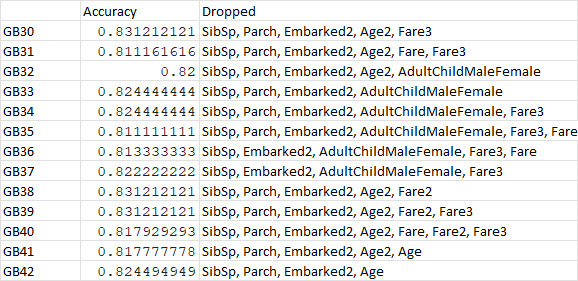

In [ ]:
#adaboost23 pipeline (dropped SibSp, Embarked2, Parch)
y = titanic['Survived']
X = titanic.drop(['PassengerId', 'Survived', 'Name', 'Sex', 'SibSp', 'Ticket', 'Cabin', 'Embarked', 'Embarked2', 'Parch'], axis=1)

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3333, random_state=42) 

AdaBoost2 = Pipeline([
    ('imp_mean', SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('scaler', StandardScaler()),
    ('AdaBoost', AdaBoostClassifier(random_state=42))

])

AdaBoost2.fit(X_train, y_train)
ADA_scores = cross_val_score(AdaBoost2, X_train, y_train, cv=10)
ADA_scores = ADA_scores.mean()
print('ADA23 accuracy(dropped SibSp, Embarked2, Parch):', ADA_scores)

#Adaboost28 pipeline (dropped SibSp, Embarked2, Age2, Fare3, Parch)
y = titanic['Survived']
X = titanic.drop(['PassengerId', 'Survived', 'Name', 'Sex', 'SibSp', 'Ticket', 'Cabin', 'Embarked', 'Embarked2', 'Age2', 'Fare3', 'Parch'], axis=1)

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3333, random_state=42) 

AdaBoost2 = Pipeline([
    ('imp_mean', SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('scaler', StandardScaler()),
    ('AdaBoost', AdaBoostClassifier(random_state=42))

])

AdaBoost2.fit(X_train, y_train)
ADA_scores = cross_val_score(AdaBoost2, X_train, y_train, cv=10)
ADA_scores = ADA_scores.mean()
print('ADA28 accuracy(dropped SibSp, Embarked2, Age2, Fare3, Parch):', ADA_scores)

#Adaboost30 pipeline (dropped SibSp, Parch, Embarked2, Age2, Fare3)
y = titanic['Survived']
X = titanic.drop(['PassengerId', 'Survived', 'Name', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked', 'Embarked2', 'Age2', 'Fare3'], axis=1)

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3333, random_state=42) 

AdaBoost2 = Pipeline([
    ('imp_mean', SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('scaler', StandardScaler()),
    ('AdaBoost', AdaBoostClassifier(random_state=42))

])

AdaBoost2.fit(X_train, y_train)
ADA_scores = cross_val_score(AdaBoost2, X_train, y_train, cv=10)
ADA_scores = ADA_scores.mean()
print('ADA30 accuracy(dropped SibSp, Parch, Embarked2, Age2, Fare3):', ADA_scores)
#adaboost38 pipeline (dropped SibSp, Parch, Embarked2, Age2, Fare2)
y = titanic['Survived']
X = titanic.drop(['PassengerId', 'Survived', 'Name', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked', 'Embarked2', 'Age2', 'Fare2'], axis=1)

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3333, random_state=42) 

AdaBoost2 = Pipeline([
    ('imp_mean', SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('scaler', StandardScaler()),
    ('AdaBoost', AdaBoostClassifier(random_state=42))

])

AdaBoost2.fit(X_train, y_train)
ADA_scores = cross_val_score(AdaBoost2, X_train, y_train, cv=10)
ADA_scores = ADA_scores.mean()
print('ADA38 accuracy(dropped SibSp, Parch, Embarked2, Age2, Fare2):', ADA_scores)

#adaboost39 pipeline (dropped SibSp, Parch, Embarked2, Age2, Fare2, Fare3)
y = titanic['Survived']
X = titanic.drop(['PassengerId', 'Survived', 'Name', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked', 'Embarked2', 'Age2', 'Fare2', 'Fare3'], axis=1)

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3333, random_state=42) 

AdaBoost2 = Pipeline([
    ('imp_mean', SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('scaler', StandardScaler()),
    ('AdaBoost', AdaBoostClassifier(random_state=42))

])

AdaBoost2.fit(X_train, y_train)
ADA_scores = cross_val_score(AdaBoost2, X_train, y_train, cv=10)
ADA_scores = ADA_scores.mean()
print('ADA39 accuracy(dropped SibSp, Parch, Embarked2, Age2, Fare2, Fare3):', ADA_scores)

ADA23 accuracy(dropped SibSp, Embarked2, Parch): 0.8244949494949495
ADA28 accuracy(dropped SibSp, Embarked2, Age2, Fare3, Parch): 0.8177272727272727
ADA30 accuracy(dropped SibSp, Parch, Embarked2, Age2, Fare3): 0.8177272727272727
ADA38 accuracy(dropped SibSp, Parch, Embarked2, Age2, Fare2): 0.8177272727272727
ADA39 accuracy(dropped SibSp, Parch, Embarked2, Age2, Fare2, Fare3): 0.8177272727272727


Since most of the Adaboost models were improving on models that were also improving the GB models, i decided to take the best GB models I had and run them with Adaboost instead to see the results. With that, I was able to find the best models of each that I had tested so far.

**Results**

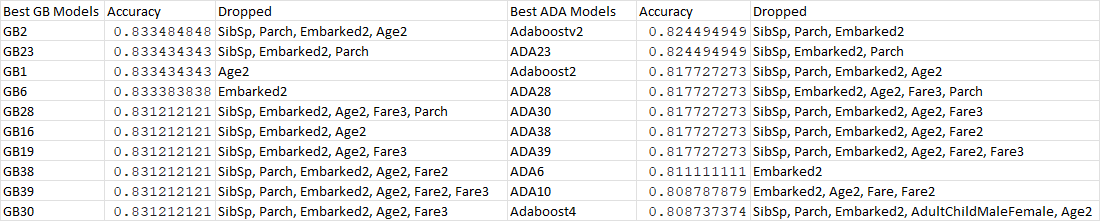

I also decided to test gradient boosting while setting up learning rates, though because there wasn't much of a difference and the learning rates only seemed to make them worse, I decided to only run a few.

   learning rate  mean accuracy
0            0.1      83.348485
1            0.2      80.444444
2            0.3      79.318182
3            0.4      78.196970
4            0.5      78.853535


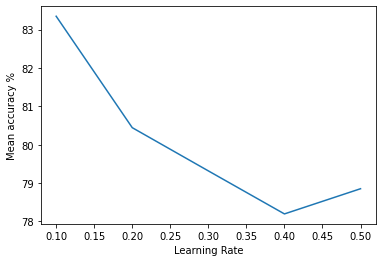

In [ ]:
#gradient boost classifier with GB2 pipeline
y = titanic['Survived']
X = titanic.drop(['PassengerId', 'Survived', 'Name', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked', 'Embarked2', 'Age2'], axis=1)

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3333, random_state=42) 
mean_accuracy = []

for i in [0.10, 0.20, 0.30, 0.40, 0.50]:
  pipe     = Pipeline([('imp_mean',SimpleImputer(missing_values=np.nan, strategy='mean')),
                     ('scaler', StandardScaler()), 
                     ('Gradient', GradientBoostingClassifier(random_state=42, learning_rate=i))])

  pipe.fit(X_train, y_train)
  scores = cross_val_score(pipe, X_train, y_train, cv=10)
  mean_accuracy.append(scores.mean())


learning_rate_df = pd.DataFrame([0.10, 0.20, 0.30, 0.40, 0.50])
learning_rate_df.rename({0:'learning rate'}, axis=1, inplace=True)

mean_accuracy_df = pd.DataFrame(mean_accuracy)*100
mean_accuracy_df.rename({0:'mean accuracy'}, axis=1, inplace=True)

to_plot = pd.concat([learning_rate_df, mean_accuracy_df], axis=1)

print(to_plot)

plt.plot(to_plot['learning rate'], to_plot['mean accuracy'])
plt.xlabel('Learning Rate')
plt.ylabel('Mean accuracy %')
plt.show()

   learning rate  mean accuracy
0           0.10      83.348485
1           0.11      82.454545
2           0.12      82.020202
3           0.13      81.343434
4           0.14      82.464646
5           0.15      80.904040


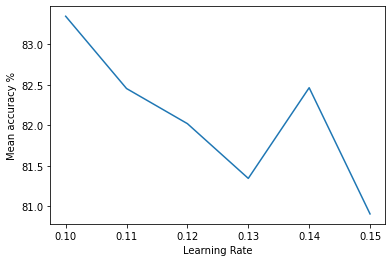

In [ ]:
#gradient boost classifier with GB2 pipeline
y = titanic['Survived']
X = titanic.drop(['PassengerId', 'Survived', 'Name', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked', 'Embarked2', 'Age2'], axis=1)

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3333, random_state=42) 
mean_accuracy = []

for i in [0.10, 0.11, 0.12, 0.13, 0.14, 0.15]:
  pipe     = Pipeline([('imp_mean',SimpleImputer(missing_values=np.nan, strategy='mean')),
                     ('scaler', StandardScaler()), 
                     ('Gradient', GradientBoostingClassifier(random_state=42, learning_rate=i))])

  pipe.fit(X_train, y_train)
  scores = cross_val_score(pipe, X_train, y_train, cv=10)
  mean_accuracy.append(scores.mean())


learning_rate_df = pd.DataFrame([0.10, 0.11, 0.12, 0.13, 0.14, 0.15])
learning_rate_df.rename({0:'learning rate'}, axis=1, inplace=True)

mean_accuracy_df = pd.DataFrame(mean_accuracy)*100
mean_accuracy_df.rename({0:'mean accuracy'}, axis=1, inplace=True)

to_plot = pd.concat([learning_rate_df, mean_accuracy_df], axis=1)

print(to_plot)

plt.plot(to_plot['learning rate'], to_plot['mean accuracy'])
plt.xlabel('Learning Rate')
plt.ylabel('Mean accuracy %')
plt.show()

   learning rate  mean accuracy
0           0.01      79.297980
1           0.02      81.767677
2           0.03      82.217172
3           0.04      82.217172
4           0.05      82.666667
5           0.06      83.121212
6           0.07      82.661616
7           0.08      83.570707
8           0.09      83.126263
9           0.10      83.348485


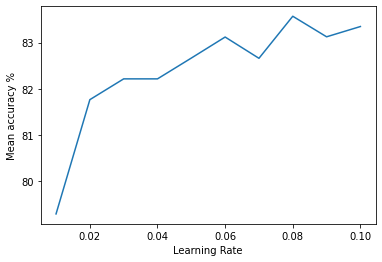

In [ ]:
#gradient boost classifier with GB2 pipeline
y = titanic['Survived']
X = titanic.drop(['PassengerId', 'Survived', 'Name', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked', 'Embarked2', 'Age2'], axis=1)

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3333, random_state=42) 
mean_accuracy = []

for i in [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1]:
  pipe     = Pipeline([('imp_mean',SimpleImputer(missing_values=np.nan, strategy='mean')),
                     ('scaler', StandardScaler()), 
                     ('Gradient', GradientBoostingClassifier(random_state=42, learning_rate=i))])

  pipe.fit(X_train, y_train)
  scores = cross_val_score(pipe, X_train, y_train, cv=10)
  mean_accuracy.append(scores.mean())


learning_rate_df = pd.DataFrame([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1])
learning_rate_df.rename({0:'learning rate'}, axis=1, inplace=True)

mean_accuracy_df = pd.DataFrame(mean_accuracy)*100
mean_accuracy_df.rename({0:'mean accuracy'}, axis=1, inplace=True)

to_plot = pd.concat([learning_rate_df, mean_accuracy_df], axis=1)

print(to_plot)

plt.plot(to_plot['learning rate'], to_plot['mean accuracy'])
plt.xlabel('Learning Rate')
plt.ylabel('Mean accuracy %')
plt.show()

   learning rate  mean accuracy
0           0.01      79.080808
1           0.02      79.757576
2           0.03      80.883838
3           0.04      81.101010
4           0.05      81.328283
5           0.06      80.651515
6           0.07      80.424242
7           0.08      80.419192
8           0.09      81.323232
9           0.10      80.429293


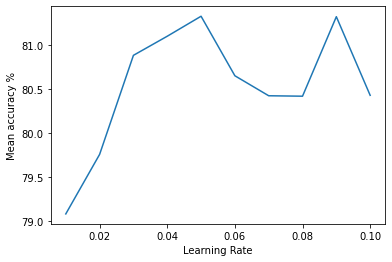

In [ ]:
#hist gradient boost classifier with GB2 pipeline
y = titanic['Survived']
X = titanic.drop(['PassengerId', 'Survived', 'Name', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked', 'Embarked2', 'Age2'], axis=1)

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3333, random_state=42) 
mean_accuracy = []

for i in [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1]:
  pipe     = Pipeline([('imp_mean',SimpleImputer(missing_values=np.nan, strategy='mean')),
                     ('scaler', StandardScaler()), 
                     ('HistGradient', HistGradientBoostingClassifier(random_state=42, learning_rate=i))])

  pipe.fit(X_train, y_train)
  scores = cross_val_score(pipe, X_train, y_train, cv=10)
  mean_accuracy.append(scores.mean())


learning_rate_df = pd.DataFrame([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1])
learning_rate_df.rename({0:'learning rate'}, axis=1, inplace=True)

mean_accuracy_df = pd.DataFrame(mean_accuracy)*100
mean_accuracy_df.rename({0:'mean accuracy'}, axis=1, inplace=True)

to_plot = pd.concat([learning_rate_df, mean_accuracy_df], axis=1)

print(to_plot)

plt.plot(to_plot['learning rate'], to_plot['mean accuracy'])
plt.xlabel('Learning Rate')
plt.ylabel('Mean accuracy %')
plt.show()

I was surprised to find in this graph that with a learning rate of 0.08, the model worked better and actually managed to get 83.5% accuracy.

   learning rate  mean accuracy
0            0.1      83.338384
1            0.2      80.868687
2            0.3      80.439394
3            0.4      79.308081
4            0.5      77.272727


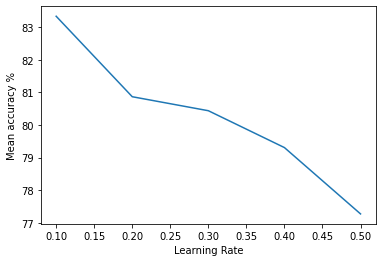

In [ ]:
#gradient boost classifier with GB6 pipeline
y = titanic['Survived']
X = titanic.drop(['PassengerId', 'Survived', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'Embarked2'], axis=1)

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3333, random_state=42) 

mean_accuracy = []

for i in [0.10, 0.20, 0.30, 0.40, 0.50]:
  pipe     = Pipeline([('imp_mean',SimpleImputer(missing_values=np.nan, strategy='mean')),
                     ('scaler', StandardScaler()), 
                     ('Gradient', GradientBoostingClassifier(random_state=42, learning_rate=i))])

  pipe.fit(X_train, y_train)
  scores = cross_val_score(pipe, X_train, y_train, cv=10)
  mean_accuracy.append(scores.mean())


learning_rate_df = pd.DataFrame([0.10, 0.20, 0.30, 0.40, 0.50])
learning_rate_df.rename({0:'learning rate'}, axis=1, inplace=True)

mean_accuracy_df = pd.DataFrame(mean_accuracy)*100
mean_accuracy_df.rename({0:'mean accuracy'}, axis=1, inplace=True)

to_plot = pd.concat([learning_rate_df, mean_accuracy_df], axis=1)

print(to_plot)

plt.plot(to_plot['learning rate'], to_plot['mean accuracy'])
plt.xlabel('Learning Rate')
plt.ylabel('Mean accuracy %')
plt.show()

   learning rate  mean accuracy
0           0.10      83.338384
1           0.11      82.444444
2           0.12      81.989899
3           0.13      82.671717
4           0.14      83.126263
5           0.15      81.772727


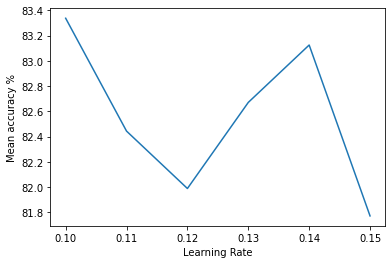

In [ ]:
#gradient boost classifier with GB6 pipeline
y = titanic['Survived']
X = titanic.drop(['PassengerId', 'Survived', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'Embarked2'], axis=1)

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3333, random_state=42) 

mean_accuracy = []

for i in [0.10, 0.11, 0.12, 0.13, 0.14, 0.15]:
  pipe     = Pipeline([('imp_mean',SimpleImputer(missing_values=np.nan, strategy='mean')),
                     ('scaler', StandardScaler()), 
                     ('Gradient', GradientBoostingClassifier(random_state=42, learning_rate=i))])

  pipe.fit(X_train, y_train)
  scores = cross_val_score(pipe, X_train, y_train, cv=10)
  mean_accuracy.append(scores.mean())


learning_rate_df = pd.DataFrame([0.10, 0.11, 0.12, 0.13, 0.14, 0.15])
learning_rate_df.rename({0:'learning rate'}, axis=1, inplace=True)

mean_accuracy_df = pd.DataFrame(mean_accuracy)*100
mean_accuracy_df.rename({0:'mean accuracy'}, axis=1, inplace=True)

to_plot = pd.concat([learning_rate_df, mean_accuracy_df], axis=1)

print(to_plot)

plt.plot(to_plot['learning rate'], to_plot['mean accuracy'])
plt.xlabel('Learning Rate')
plt.ylabel('Mean accuracy %')
plt.show()

   learning rate  mean accuracy
0           0.01      79.308081
1           0.02      82.222222
2           0.03      82.666667
3           0.04      83.116162
4           0.05      83.560606
5           0.06      83.333333
6           0.07      83.560606
7           0.08      83.338384
8           0.09      83.570707
9           0.10      83.338384


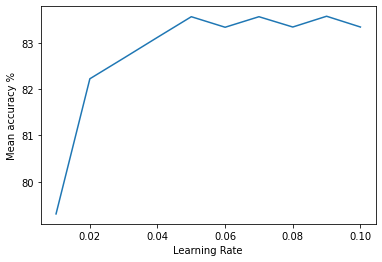

In [ ]:
#gradient boost classifier with GB6 pipeline
y = titanic['Survived']
X = titanic.drop(['PassengerId', 'Survived', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'Embarked2'], axis=1)

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3333, random_state=42) 

mean_accuracy = []

for i in [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1]:
  pipe     = Pipeline([('imp_mean',SimpleImputer(missing_values=np.nan, strategy='mean')),
                     ('scaler', StandardScaler()), 
                     ('Gradient', GradientBoostingClassifier(random_state=42, learning_rate=i))])

  pipe.fit(X_train, y_train)
  scores = cross_val_score(pipe, X_train, y_train, cv=10)
  mean_accuracy.append(scores.mean())


learning_rate_df = pd.DataFrame([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1])
learning_rate_df.rename({0:'learning rate'}, axis=1, inplace=True)

mean_accuracy_df = pd.DataFrame(mean_accuracy)*100
mean_accuracy_df.rename({0:'mean accuracy'}, axis=1, inplace=True)

to_plot = pd.concat([learning_rate_df, mean_accuracy_df], axis=1)

print(to_plot)

plt.plot(to_plot['learning rate'], to_plot['mean accuracy'])
plt.xlabel('Learning Rate')
plt.ylabel('Mean accuracy %')
plt.show()

With the learning rate even smaller on the GB6 model I was able to again find figures in the 83.5% range which I hadn't before.

# Decision Tree Visuals

These are the same trees as above except with visuals instead of just printing the accuracy

In [ ]:
#setting X and y
y = titanic['Survived']
X = titanic.drop(['PassengerId', 'Survived', 'Name', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], axis=1)

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3333, random_state=42) 

#pipeline for decision tree
tree1 = Pipeline([
    ('imp_mean', SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('scaler', StandardScaler()),
    ('tree', DecisionTreeClassifier(criterion='entropy',random_state=42))

])

tree1.fit(X_train, y_train)

import sklearn
#decision tree visual with Pclass, Sex, Age, and Embarked

features = ['Pclass', 'Age', 'Sex2', 'Embarked2']

dot_data = StringIO()
sklearn.tree.export_graphviz(tree1.named_steps['tree'], out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = features,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('tree.png')
Image(graph.create_png())

In [ ]:
#setting X and y
y = titanic['Survived']
X = titanic.drop(['PassengerId', 'Survived', 'Name', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked', 'Embarked2'], axis=1)

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3333, random_state=42) 

#pipeline for decision tree
tree2 = Pipeline([
    ('imp_mean', SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('scaler', StandardScaler()),
    ('tree', DecisionTreeClassifier(criterion='entropy',random_state=42))

])

tree2.fit(X_train, y_train)

import sklearn
#decision tree visual with Pclass, Sex, Age, and Fare

features = ['Pclass', 'Age', 'Sex2', 'Fare']

dot_data = StringIO()
sklearn.tree.export_graphviz(tree2.named_steps['tree'], out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = features,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('tree.png')
Image(graph.create_png())

In [ ]:
#setting X and y
y = titanic['Survived']
X = titanic.drop(['PassengerId', 'Survived', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'Embarked2', 'Fare'], axis=1)

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3333, random_state=42) 

#pipeline for decision tree
tree3 = Pipeline([
    ('imp_mean', SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('scaler', StandardScaler()),
    ('tree', DecisionTreeClassifier(criterion='entropy',random_state=42))

])

tree3.fit(X_train, y_train)

import sklearn
#decision tree visual with Pclass, Sex, Age, and Fare

features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Sex2']

dot_data = StringIO()
sklearn.tree.export_graphviz(tree3.named_steps['tree'], out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = features,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('tree.png')
Image(graph.create_png())



# Forests

In [ ]:
#Forest classifier
y = titanic['Survived']
X = titanic.drop(['PassengerId', 'Survived', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1)

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3333, random_state=42) 

forest     = Pipeline([('imp_mean',SimpleImputer(missing_values=np.nan, strategy='mean')),
                     ('scaler', StandardScaler()), 
                     ('tree', RandomForestClassifier(random_state=42))])

forest.fit(X_train, y_train)

scores = cross_val_score(forest, X_train, y_train, cv=10)

print('Forest1(All) accuracy')
print(scores.mean())

#Forest2(dropped SibSp, Parch, Embarked2)
y = titanic['Survived']
X = titanic.drop(['PassengerId', 'Survived', 'Name', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked', 'Embarked2'], axis=1)

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3333, random_state=42) 

forest     = Pipeline([('imp_mean',SimpleImputer(missing_values=np.nan, strategy='mean')),
                     ('scaler', StandardScaler()), 
                     ('tree', RandomForestClassifier(random_state=42))])

forest.fit(X_train, y_train)

scores = cross_val_score(forest, X_train, y_train, cv=10)
print('Forest2(dropped SibSp, Parch, Embarked2) accuracy')
print(scores.mean())

#Forest3(dropped SibSp, Parch, Embarked2, Age2)
y = titanic['Survived']
X = titanic.drop(['PassengerId', 'Survived', 'Name', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked', 'Embarked2', 'Age2'], axis=1)

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3333, random_state=42) 

forest     = Pipeline([('imp_mean',SimpleImputer(missing_values=np.nan, strategy='mean')),
                     ('scaler', StandardScaler()), 
                     ('tree', RandomForestClassifier(random_state=42))])

forest.fit(X_train, y_train)

scores = cross_val_score(forest, X_train, y_train, cv=10)
print('Forest3(dropped SibSp, Parch, Embarked2, Age2) accuracy')
print(scores.mean())

#Forest4(dropped SibSp, Parch, Embarked2, AdultChildMaleFemale)
y = titanic['Survived']
X = titanic.drop(['PassengerId', 'Survived', 'Name', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked', 'Embarked2', 'AdultChildMaleFemale'], axis=1)

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3333, random_state=42) 

forest     = Pipeline([('imp_mean',SimpleImputer(missing_values=np.nan, strategy='mean')),
                     ('scaler', StandardScaler()), 
                     ('tree', RandomForestClassifier(random_state=42))])

forest.fit(X_train, y_train)

scores = cross_val_score(forest, X_train, y_train, cv=10)
print('Forest4(dropped SibSp, Parch, Embarked2, AdultChildMaleFemale) accuracy')
print(scores.mean())

#Forest5(dropped SibSp, Parch, Embarked2, AdultChildMaleFemale, Age2)
y = titanic['Survived']
X = titanic.drop(['PassengerId', 'Survived', 'Name', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked', 'Embarked2', 'AdultChildMaleFemale', 'Age2'], axis=1)

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3333, random_state=42) 

forest     = Pipeline([('imp_mean',SimpleImputer(missing_values=np.nan, strategy='mean')),
                     ('scaler', StandardScaler()), 
                     ('tree', RandomForestClassifier(random_state=42))])

forest.fit(X_train, y_train)

scores = cross_val_score(forest, X_train, y_train, cv=10)
print('Forest5(dropped SibSp, Parch, Embarked2, AdultChildMaleFemale, Age2) accuracy')
print(scores.mean())

#Forest6(dropped SibSp, Parch, Fare)
y = titanic['Survived']
X = titanic.drop(['PassengerId', 'Survived', 'Name', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], axis=1)

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3333, random_state=42) 

forest     = Pipeline([('imp_mean',SimpleImputer(missing_values=np.nan, strategy='mean')),
                     ('scaler', StandardScaler()), 
                     ('tree', RandomForestClassifier(random_state=42))])

forest.fit(X_train, y_train)

scores = cross_val_score(forest, X_train, y_train, cv=10)
print('Forest6(dropped SibSp, Parch, Fare) accuracy')
print(scores.mean())

#Forest7(dropped SibSp, Parch, Fare, Embarked2)
y = titanic['Survived']
X = titanic.drop(['PassengerId', 'Survived', 'Name', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Embarked2'], axis=1)

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3333, random_state=42) 

forest     = Pipeline([('imp_mean',SimpleImputer(missing_values=np.nan, strategy='mean')),
                     ('scaler', StandardScaler()), 
                     ('tree', RandomForestClassifier(random_state=42))])

forest.fit(X_train, y_train)

scores = cross_val_score(forest, X_train, y_train, cv=10)
print('Forest7(dropped SibSp, Parch, Fare, Embarked2) accuracy')
print(scores.mean())

#Forest8(dropped Parch, Fare)
y = titanic['Survived']
X = titanic.drop(['PassengerId', 'Survived', 'Name', 'Sex', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], axis=1)

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3333, random_state=42) 

forest     = Pipeline([('imp_mean',SimpleImputer(missing_values=np.nan, strategy='mean')),
                     ('scaler', StandardScaler()), 
                     ('tree', RandomForestClassifier(random_state=42))])

forest.fit(X_train, y_train)

scores = cross_val_score(forest, X_train, y_train, cv=10)
print('Forest8(dropped Parch, Fare) accuracy')
print(scores.mean())

#Forest9(dropped SibSp, Fare)
y = titanic['Survived']
X = titanic.drop(['PassengerId', 'Survived', 'Name', 'Sex', 'SibSp', 'Ticket', 'Fare', 'Cabin', 'Embarked'], axis=1)

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3333, random_state=42) 

forest     = Pipeline([('imp_mean',SimpleImputer(missing_values=np.nan, strategy='mean')),
                     ('scaler', StandardScaler()), 
                     ('tree', RandomForestClassifier(random_state=42))])

forest.fit(X_train, y_train)

scores = cross_val_score(forest, X_train, y_train, cv=10)
print('Forest9(dropped SibSp, Fare) accuracy')
print(scores.mean())

#Forest10(dropped SibSp, Parch)
y = titanic['Survived']
X = titanic.drop(['PassengerId', 'Survived', 'Name', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked'], axis=1)

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3333, random_state=42) 

forest     = Pipeline([('imp_mean',SimpleImputer(missing_values=np.nan, strategy='mean')),
                     ('scaler', StandardScaler()), 
                     ('tree', RandomForestClassifier(random_state=42))])

forest.fit(X_train, y_train)

scores = cross_val_score(forest, X_train, y_train, cv=10)
print('Forest10(dropped SibSp, Parch) accuracy')
print(scores.mean())

Forest1(All) accuracy
0.7975252525252525
Forest2(dropped SibSp, Parch, Embarked2) accuracy
0.7998484848484847
Forest3(dropped SibSp, Parch, Embarked2, Age2) accuracy
0.8066161616161617
Forest4(dropped SibSp, Parch, Embarked2, AdultChildMaleFemale) accuracy
0.8020202020202019
Forest5(dropped SibSp, Parch, Embarked2, AdultChildMaleFemale, Age2) accuracy
0.811010101010101
Forest6(dropped SibSp, Parch, Fare) accuracy
0.7979292929292929
Forest7(dropped SibSp, Parch, Fare, Embarked2) accuracy
0.7955555555555555
Forest8(dropped Parch, Fare) accuracy
0.7887878787878788
Forest9(dropped SibSp, Fare) accuracy
0.7977272727272727
Forest10(dropped SibSp, Parch) accuracy
0.7932323232323231


I wanted to run Forest3, Forest4, and Forest5 while not dropping Embarked2, renaming them to Forest 3a, Forest4a and Forest5a.

Results

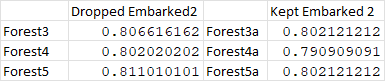



In [ ]:
#Forest3a(dropped SibSp, Parch, Age2)
y = titanic['Survived']
X = titanic.drop(['PassengerId', 'Survived', 'Name', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked', 'Age2'], axis=1)

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3333, random_state=42) 

forest     = Pipeline([('imp_mean',SimpleImputer(missing_values=np.nan, strategy='mean')),
                     ('scaler', StandardScaler()), 
                     ('tree', RandomForestClassifier(random_state=42))])

forest.fit(X_train, y_train)

scores = cross_val_score(forest, X_train, y_train, cv=10)
print('Forest3a(dropped SibSp, Parch, Age2) accuracy')
print(scores.mean())

#Forest4a(dropped SibSp, Parch, AdultChildMaleFemale)
y = titanic['Survived']
X = titanic.drop(['PassengerId', 'Survived', 'Name', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked', 'AdultChildMaleFemale'], axis=1)

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3333, random_state=42) 

forest     = Pipeline([('imp_mean',SimpleImputer(missing_values=np.nan, strategy='mean')),
                     ('scaler', StandardScaler()), 
                     ('tree', RandomForestClassifier(random_state=42))])

forest.fit(X_train, y_train)

scores = cross_val_score(forest, X_train, y_train, cv=10)
print('Forest4a(dropped SibSp, Parch, AdultChildMaleFemale) accuracy')
print(scores.mean())

#Forest5a(dropped SibSp, Parch, Embarked2, AdultChildMaleFemale, Age2)
y = titanic['Survived']
X = titanic.drop(['PassengerId', 'Survived', 'Name', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked', 'AdultChildMaleFemale', 'Age2'], axis=1)

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3333, random_state=42) 

forest     = Pipeline([('imp_mean',SimpleImputer(missing_values=np.nan, strategy='mean')),
                     ('scaler', StandardScaler()), 
                     ('tree', RandomForestClassifier(random_state=42))])

forest.fit(X_train, y_train)

scores = cross_val_score(forest, X_train, y_train, cv=10)
print('Forest5a(dropped SibSp, Parch, AdultChildMaleFemale, Age2) accuracy')
print(scores.mean())

Forest3a(dropped SibSp, Parch, Age2) accuracy
0.8043939393939394
Forest4a(dropped SibSp, Parch, AdultChildMaleFemale) accuracy
0.7909090909090909
Forest5a(dropped SibSp, Parch, AdultChildMaleFemale, Age2) accuracy
0.8021212121212121


# Imputing Names

This was mostly for fun by assigning value to the first letter in the passenger's name, surprisingly I got good results.

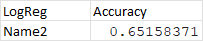


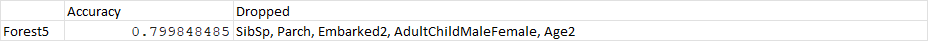

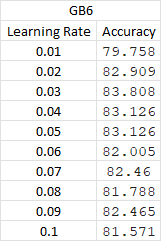

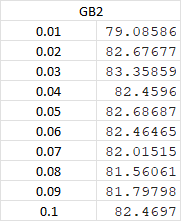


In [ ]:
#variables for logistic regression
y = titanic2[['Survived', 'Name2']]
y = y.dropna()
y = y[['Survived']]
X = titanic2[['Name2']]
X = X.dropna()

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3333, random_state=42) 

#logistic regression for sex vs survived
log_reg = LogisticRegression(random_state=0)
log_reg_model = log_reg.fit(X_train, y_train)
accuracy = log_reg_model.score(X_train, y_train)
print('name2-survival log_reg accuracy')
print(accuracy)

#Forest5(dropped SibSp, Parch, Embarked2, AdultChildMaleFemale, Age2)
y = titanic2['Survived']
X = titanic2.drop(['PassengerId', 'Survived', 'Name', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked', 'Embarked2', 'AdultChildMaleFemale', 'Age2'], axis=1)

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3333, random_state=42) 

forest     = Pipeline([('imp_mean',SimpleImputer(missing_values=np.nan, strategy='mean')),
                     ('scaler', StandardScaler()), 
                     ('tree', RandomForestClassifier(random_state=42))])

forest.fit(X_train, y_train)

scores = cross_val_score(forest, X_train, y_train, cv=10)
print('Forest5(dropped SibSp, Parch, Embarked2, AdultChildMaleFemale, Age2) accuracy')
print(scores.mean())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


name2-survival log_reg accuracy
0.6515837104072398
Forest5(dropped SibSp, Parch, Embarked2, AdultChildMaleFemale, Age2) accuracy
0.7998484848484848


   learning rate  mean accuracy
0           0.01      79.757576
1           0.02      82.909091
2           0.03      83.808081
3           0.04      83.126263
4           0.05      83.126263
5           0.06      82.005051
6           0.07      82.459596
7           0.08      81.787879
8           0.09      82.464646
9           0.10      81.570707


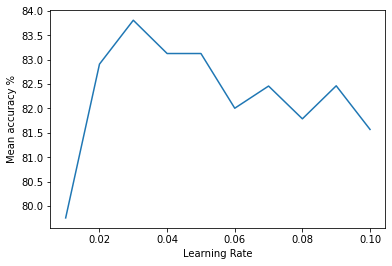

In [ ]:
#gradient boost classifier with GB6 pipeline
y = titanic2['Survived']
X = titanic2.drop(['PassengerId', 'Survived', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'Embarked2'], axis=1)

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3333, random_state=42) 

mean_accuracy = []

for i in [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1]:
  pipe     = Pipeline([('imp_mean',SimpleImputer(missing_values=np.nan, strategy='mean')),
                     ('scaler', StandardScaler()), 
                     ('Gradient', GradientBoostingClassifier(random_state=42, learning_rate=i))])

  pipe.fit(X_train, y_train)
  scores = cross_val_score(pipe, X_train, y_train, cv=10)
  mean_accuracy.append(scores.mean())


learning_rate_df = pd.DataFrame([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1])
learning_rate_df.rename({0:'learning rate'}, axis=1, inplace=True)

mean_accuracy_df = pd.DataFrame(mean_accuracy)*100
mean_accuracy_df.rename({0:'mean accuracy'}, axis=1, inplace=True)

to_plot = pd.concat([learning_rate_df, mean_accuracy_df], axis=1)

print(to_plot)

plt.plot(to_plot['learning rate'], to_plot['mean accuracy'])
plt.xlabel('Learning Rate')
plt.ylabel('Mean accuracy %')
plt.show()


   learning rate  mean accuracy
0           0.10      81.570707
1           0.15      80.671717
2           0.20      79.550505
3           0.25      80.439394
4           0.30      78.853535
5           0.35      79.313131
6           0.40      78.171717
7           0.45      79.303030
8           0.50      78.863636


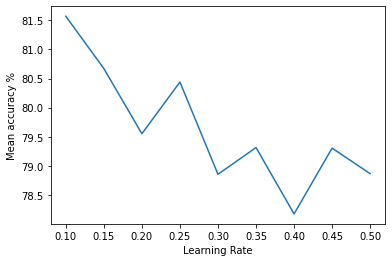

In [ ]:
#gradient boost classifier with GB6 pipeline
y = titanic2['Survived']
X = titanic2.drop(['PassengerId', 'Survived', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'Embarked2'], axis=1)

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3333, random_state=42) 

mean_accuracy = []

for i in [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]:
  pipe     = Pipeline([('imp_mean',SimpleImputer(missing_values=np.nan, strategy='mean')),
                     ('scaler', StandardScaler()), 
                     ('Gradient', GradientBoostingClassifier(random_state=42, learning_rate=i))])

  pipe.fit(X_train, y_train)
  scores = cross_val_score(pipe, X_train, y_train, cv=10)
  mean_accuracy.append(scores.mean())


learning_rate_df = pd.DataFrame([0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5])
learning_rate_df.rename({0:'learning rate'}, axis=1, inplace=True)

mean_accuracy_df = pd.DataFrame(mean_accuracy)*100
mean_accuracy_df.rename({0:'mean accuracy'}, axis=1, inplace=True)

to_plot = pd.concat([learning_rate_df, mean_accuracy_df], axis=1)

print(to_plot)

plt.plot(to_plot['learning rate'], to_plot['mean accuracy'])
plt.xlabel('Learning Rate')
plt.ylabel('Mean accuracy %')
plt.show()


   learning rate  mean accuracy
0           0.01      79.085859
1           0.02      82.676768
2           0.03      83.358586
3           0.04      82.459596
4           0.05      82.686869
5           0.06      82.464646
6           0.07      82.015152
7           0.08      81.560606
8           0.09      81.797980
9           0.10      82.469697


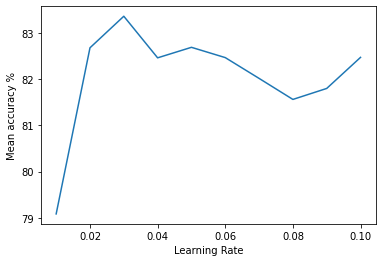

In [ ]:
#gradient boost classifier with GB2 pipeline
y = titanic2['Survived']
X = titanic2.drop(['PassengerId', 'Survived', 'Name', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked', 'Embarked2', 'Age2'], axis=1)

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3333, random_state=42) 
mean_accuracy = []

for i in [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1]:
  pipe     = Pipeline([('imp_mean',SimpleImputer(missing_values=np.nan, strategy='mean')),
                     ('scaler', StandardScaler()), 
                     ('Gradient', GradientBoostingClassifier(random_state=42, learning_rate=i))])

  pipe.fit(X_train, y_train)
  scores = cross_val_score(pipe, X_train, y_train, cv=10)
  mean_accuracy.append(scores.mean())


learning_rate_df = pd.DataFrame([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1])
learning_rate_df.rename({0:'learning rate'}, axis=1, inplace=True)

mean_accuracy_df = pd.DataFrame(mean_accuracy)*100
mean_accuracy_df.rename({0:'mean accuracy'}, axis=1, inplace=True)

to_plot = pd.concat([learning_rate_df, mean_accuracy_df], axis=1)

print(to_plot)

plt.plot(to_plot['learning rate'], to_plot['mean accuracy'])
plt.xlabel('Learning Rate')
plt.ylabel('Mean accuracy %')
plt.show()

   learning rate  mean accuracy
0           0.10      82.469697
1           0.15      81.126263
2           0.20      80.232323
3           0.25      77.520202
4           0.30      78.636364
5           0.35      77.742424
6           0.40      78.853535
7           0.45      76.611111
8           0.50      77.060606


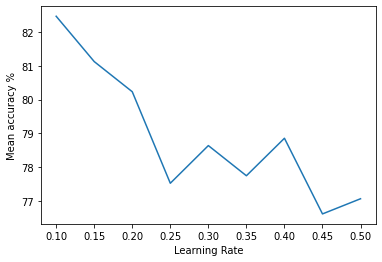

In [ ]:
#gradient boost classifier with GB2 pipeline
y = titanic2['Survived']
X = titanic2.drop(['PassengerId', 'Survived', 'Name', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked', 'Embarked2', 'Age2'], axis=1)

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3333, random_state=42) 
mean_accuracy = []

for i in [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]:
  pipe     = Pipeline([('imp_mean',SimpleImputer(missing_values=np.nan, strategy='mean')),
                     ('scaler', StandardScaler()), 
                     ('Gradient', GradientBoostingClassifier(random_state=42, learning_rate=i))])

  pipe.fit(X_train, y_train)
  scores = cross_val_score(pipe, X_train, y_train, cv=10)
  mean_accuracy.append(scores.mean())


learning_rate_df = pd.DataFrame([0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5])
learning_rate_df.rename({0:'learning rate'}, axis=1, inplace=True)

mean_accuracy_df = pd.DataFrame(mean_accuracy)*100
mean_accuracy_df.rename({0:'mean accuracy'}, axis=1, inplace=True)

to_plot = pd.concat([learning_rate_df, mean_accuracy_df], axis=1)

print(to_plot)

plt.plot(to_plot['learning rate'], to_plot['mean accuracy'])
plt.xlabel('Learning Rate')
plt.ylabel('Mean accuracy %')
plt.show()

In [ ]:
#Tree25
y = titanic2['Survived']
X = titanic2.drop(['Survived', 'PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked', 'Sex', 'Fare', 'Fare3', 'Age', 'SibSp', 'Age2'], axis=1)

#train_test_split
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3333, random_state=42) 

#pipeline for decision tree
tree1 = Pipeline([
    ('imp_mean', SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('scaler', StandardScaler()),
    ('tree', DecisionTreeClassifier(criterion='entropy',random_state=42))

])

tree1.fit(X_train, y_train)

import sklearn
#decision tree visual

features = [ 'Parch', 'Fare2', 'Sex2', 'AdultChildMaleFemale', 'Pclass', 'Embarked2', 'Name2']

dot_data = StringIO()
sklearn.tree.export_graphviz(tree1.named_steps['tree'], out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = features,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('tree.png')
Image(graph.create_png())

#drop print to get the image
scores = cross_val_score(tree1, X_train, y_train, cv=10)
print('Tree25 score with Parch, Fare2, Sex2, Pclass, AdultChildMaleFemale, Embarked2, Name2')
print(scores.mean())

#adaboost pipeline (Pclass, Age, and Sex)
y = titanic2['Survived']
X = titanic2.drop(['PassengerId', 'Survived', 'Name', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked', 'Embarked2'], axis=1)

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3333, random_state=42) 

AdaBoost2 = Pipeline([
    ('imp_mean', SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('scaler', StandardScaler()),
    ('AdaBoost', AdaBoostClassifier(random_state=42))

])

AdaBoost2.fit(X_train, y_train)
scores = cross_val_score(AdaBoost2, X_train, y_train, cv=10)
scores = scores.mean()
print('Adaboost accuracy(dropped SibSp, Parch, Embarked2):', scores)

Tree25 score with Parch, Fare2, Sex2, Pclass, AdultChildMaleFemale, Embarked2, Name2
0.7507070707070708
Adaboost accuracy(dropped SibSp, Parch, Embarked2): 0.7864646464646465


# Step 6: Evaluate the Baseline Model

# All Tables

I have noted in each sections what led me to each change, but for the most part I would take the most accurate models out of 4-5 models I would test and build off the most accurate ones. I ended up with these models in the end. I left out the models where I added 'Name2' in the second data set because I don't think there is a correlation it is just a coincidence that the model improved.

**trees**

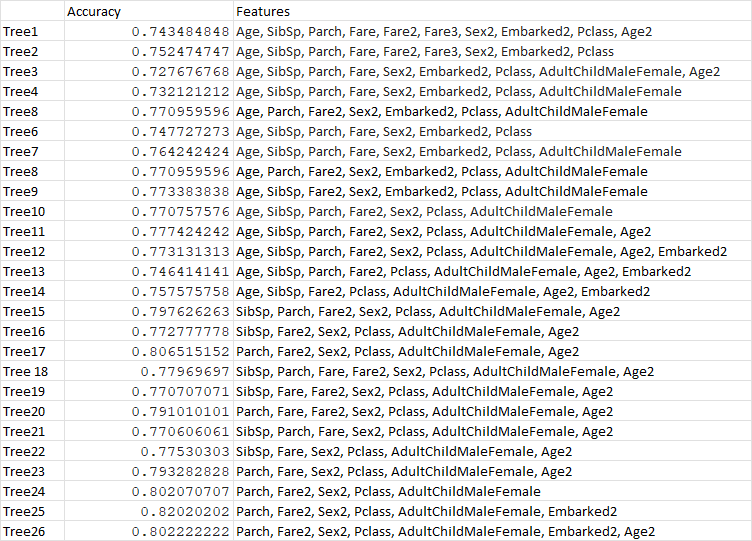

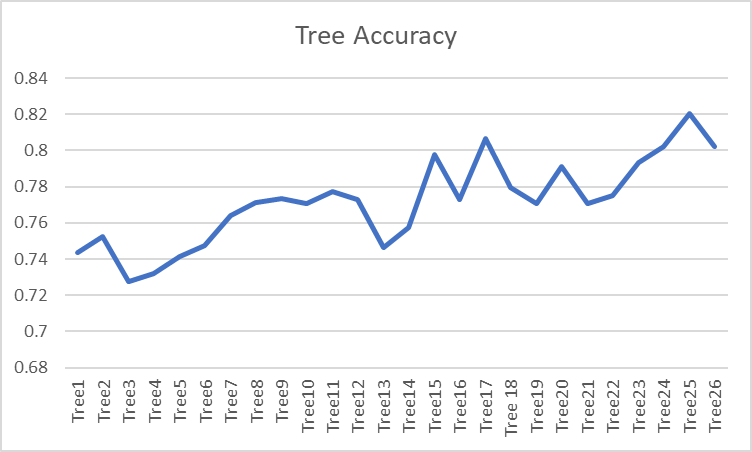

**Gradientboost**

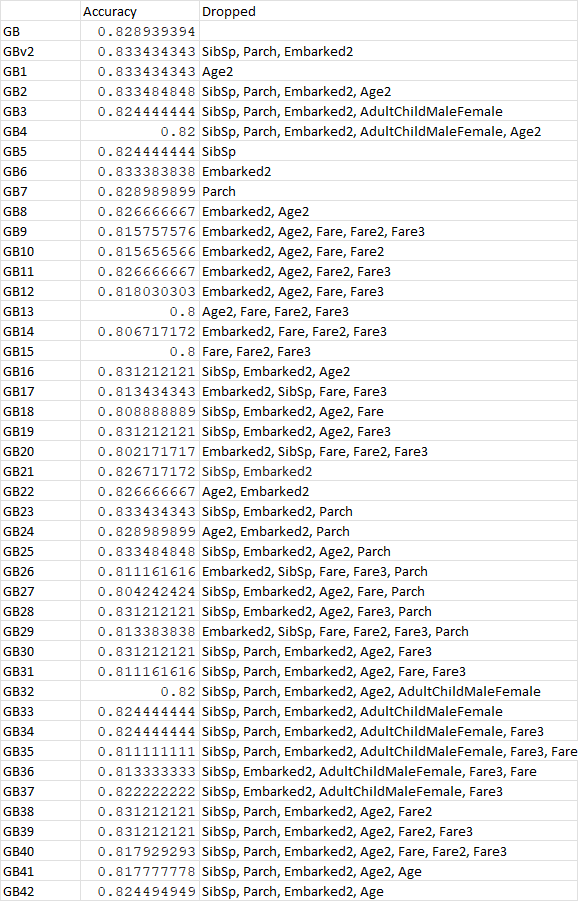

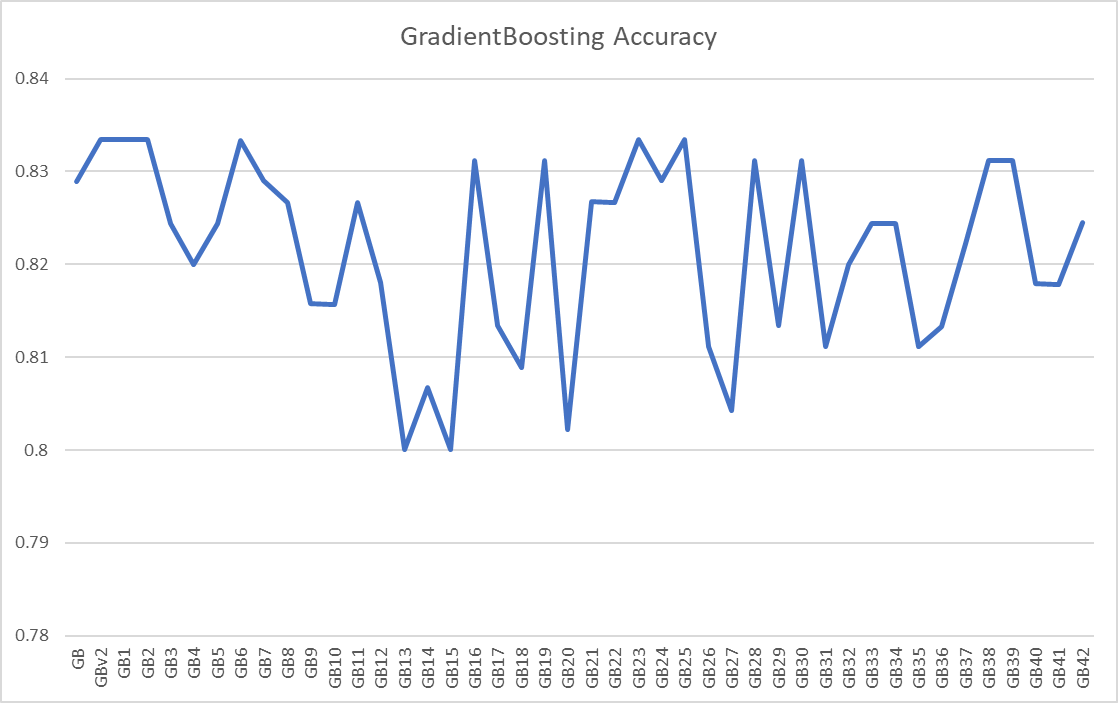

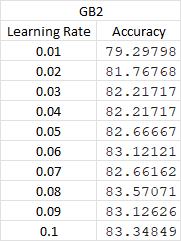

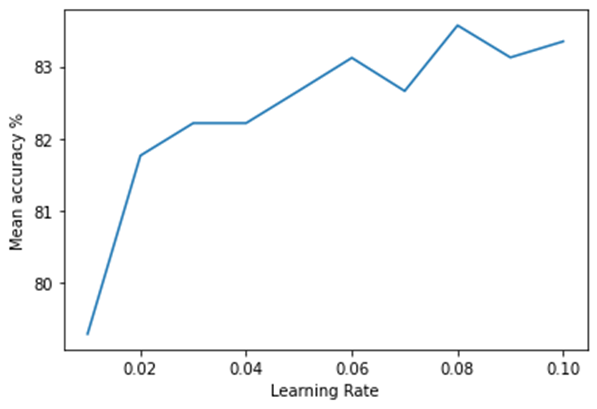

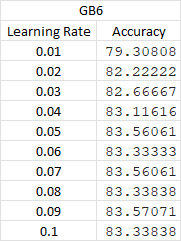

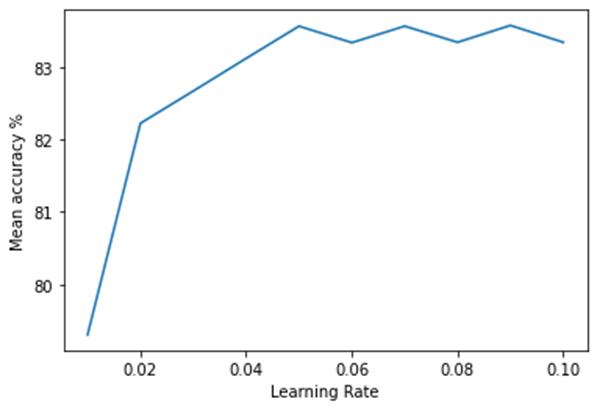

**AdaBoost**

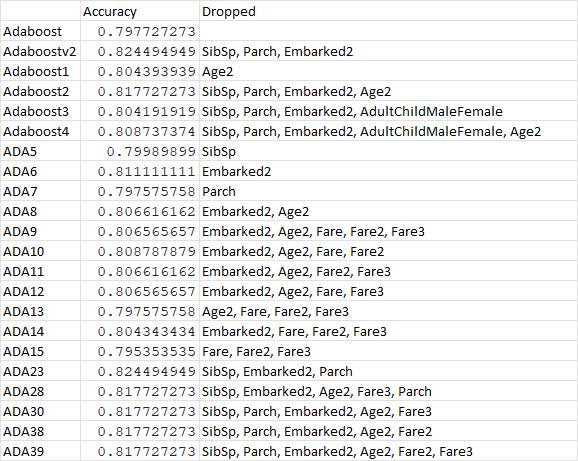

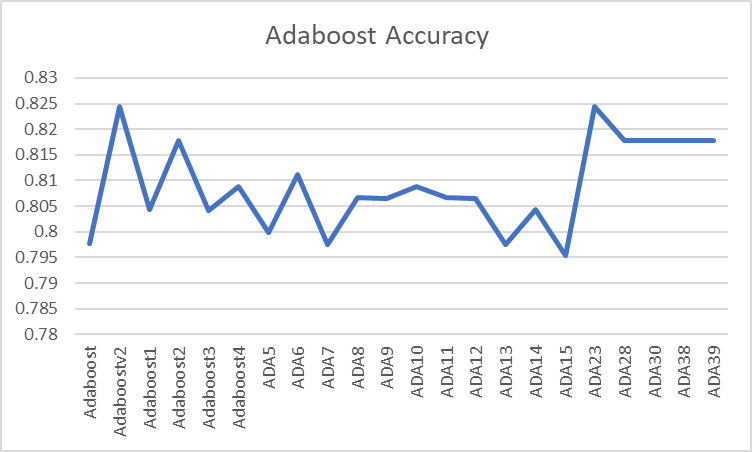

**Forest**

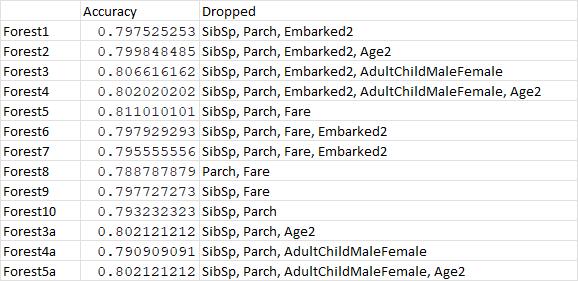

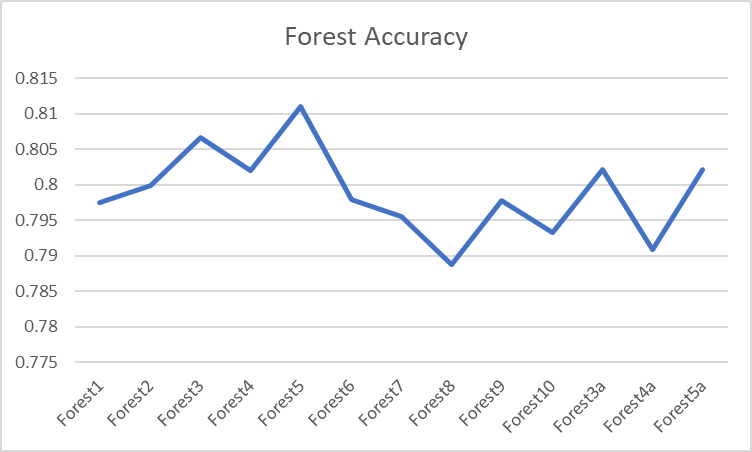

**20 best models**

(Models GB2 and GB25 are the same, I forgot I had just ordered the dropped columns in a different order)

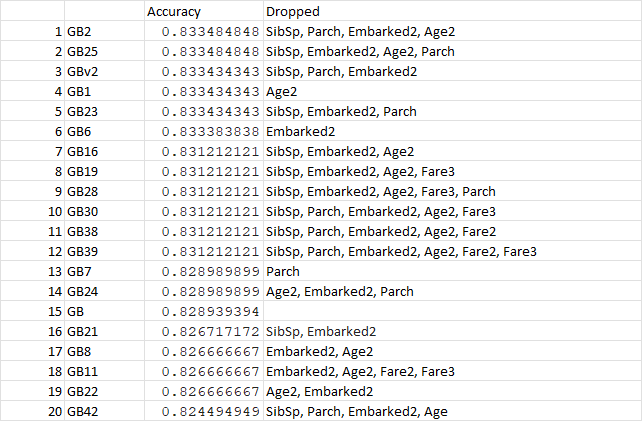

Best Models Including Learning Rates of GB2 and GB6

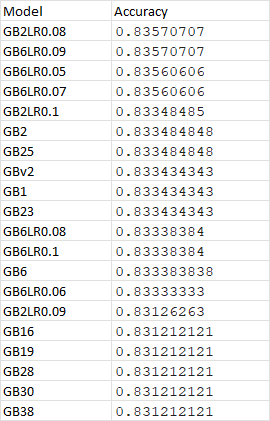

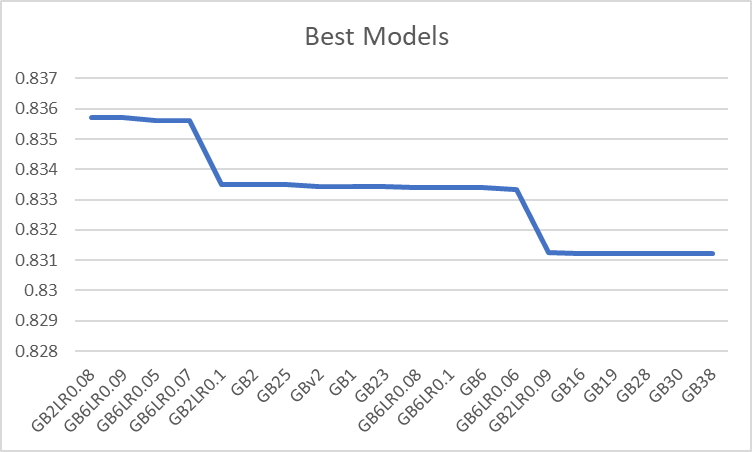